<a href="https://colab.research.google.com/github/Roshni234/ride_optima/blob/main/dynamic_pricing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
data=pd.read_csv('/content/dynamic_pricing.csv')
data.head()


,Number_of_Riders,Number_of_Drivers,Location_Category,Customer_Loyalty_Status,Number_of_Past_Rides,Average_Ratings,Time_of_Booking,Vehicle_Type,Expected_Ride_Duration,Historical_Cost_of_Ride
0,90,45,Urban,Silver,13,4.47,Night,Premium,90,284.257273
1,58,39,Suburban,Silver,72,4.06,Evening,Economy,43,173.874753
2,42,31,Rural,Silver,0,3.99,Afternoon,Premium,76,329.795469
3,89,28,Rural,Regular,67,4.31,Afternoon,Premium,134,470.201232
4,78,22,Rural,Regular,74,3.77,Afternoon,Economy,149,579.681422


In [ ]:
data.tail()

,Number_of_Riders,Number_of_Drivers,Location_Category,Customer_Loyalty_Status,Number_of_Past_Rides,Average_Ratings,Time_of_Booking,Vehicle_Type,Expected_Ride_Duration,Historical_Cost_of_Ride
995,33,23,Urban,Gold,24,4.21,Morning,Premium,11,91.389526
996,84,29,Urban,Regular,92,4.55,Morning,Premium,94,424.155987
997,44,6,Suburban,Gold,80,4.13,Night,Premium,40,157.364830
998,53,27,Suburban,Regular,78,3.63,Night,Premium,58,279.095048
999,78,63,Rural,Gold,14,4.21,Afternoon,Economy,147,655.065106


In [ ]:
data.describe()

,Number_of_Riders,Number_of_Drivers,Number_of_Past_Rides,Average_Ratings,Expected_Ride_Duration,Historical_Cost_of_Ride
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,60.372000,27.076000,50.031000,4.257220,99.58800,372.502623
std,23.701506,19.068346,29.313774,0.435781,49.16545,187.158756
min,20.000000,5.000000,0.000000,3.500000,10.00000,25.993449
25%,40.000000,11.000000,25.000000,3.870000,59.75000,221.365202
50%,60.000000,22.000000,51.000000,4.270000,102.00000,362.019426
75%,81.000000,38.000000,75.000000,4.632500,143.00000,510.497504
max,100.000000,89.000000,100.000000,5.000000,180.00000,836.116419


In [ ]:
print(data.isnull().sum())
print("Duplicate values:",data.duplicated().sum())

Number_of_Riders           0
Number_of_Drivers          0
Location_Category          0
Customer_Loyalty_Status    0
Number_of_Past_Rides       0
Average_Ratings            0
Time_of_Booking            0
Vehicle_Type               0
Expected_Ride_Duration     0
Historical_Cost_of_Ride    0
dtype: int64
Duplicate values: 0


In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Number_of_Riders         1000 non-null   int64  
 1   Number_of_Drivers        1000 non-null   int64  
 2   Location_Category        1000 non-null   object 
 3   Customer_Loyalty_Status  1000 non-null   object 
 4   Number_of_Past_Rides     1000 non-null   int64  
 5   Average_Ratings          1000 non-null   float64
 6   Time_of_Booking          1000 non-null   object 
 7   Vehicle_Type             1000 non-null   object 
 8   Expected_Ride_Duration   1000 non-null   int64  
 9   Historical_Cost_of_Ride  1000 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 78.3+ KB
None


In [ ]:
print(data.shape)


(1000, 10)


In [ ]:
print(data.columns)

Index(['Number_of_Riders', 'Number_of_Drivers', 'Location_Category',
       'Customer_Loyalty_Status', 'Number_of_Past_Rides', 'Average_Ratings',
       'Time_of_Booking', 'Vehicle_Type', 'Expected_Ride_Duration',
       'Historical_Cost_of_Ride'],
      dtype='object')


In [ ]:
print(data.dtypes)

Number_of_Riders             int64
Number_of_Drivers            int64
Location_Category           object
Customer_Loyalty_Status     object
Number_of_Past_Rides         int64
Average_Ratings            float64
Time_of_Booking             object
Vehicle_Type                object
Expected_Ride_Duration       int64
Historical_Cost_of_Ride    float64
dtype: object


In [ ]:
print(data.nunique()) #unique value in column

Number_of_Riders             81
Number_of_Drivers            79
Location_Category             3
Customer_Loyalty_Status       3
Number_of_Past_Rides        101
Average_Ratings             151
Time_of_Booking               4
Vehicle_Type                  2
Expected_Ride_Duration      171
Historical_Cost_of_Ride    1000
dtype: int64


In [ ]:
print("\nDescriptive Statistics (Categorical):\n", data.describe(include='object'))



Descriptive Statistics (Categorical):
        Location_Category Customer_Loyalty_Status Time_of_Booking Vehicle_Type
count               1000                    1000            1000         1000
unique                 3                       3               4            2
top                Urban                  Silver           Night      Premium
freq                 346                     367             276          522


In [ ]:
import pandas as pd

# Load dataset
df = pd.read_csv("dynamic_pricing.csv")

# Detect outliers (IQR method)
for col in df.select_dtypes(include=['int64', 'float64']).columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    print(f"{col}: {len(outliers)} outliers")


Number_of_Riders: 0 outliers
Number_of_Drivers: 10 outliers
Number_of_Past_Rides: 0 outliers
Average_Ratings: 0 outliers
Expected_Ride_Duration: 0 outliers
Historical_Cost_of_Ride: 0 outliers


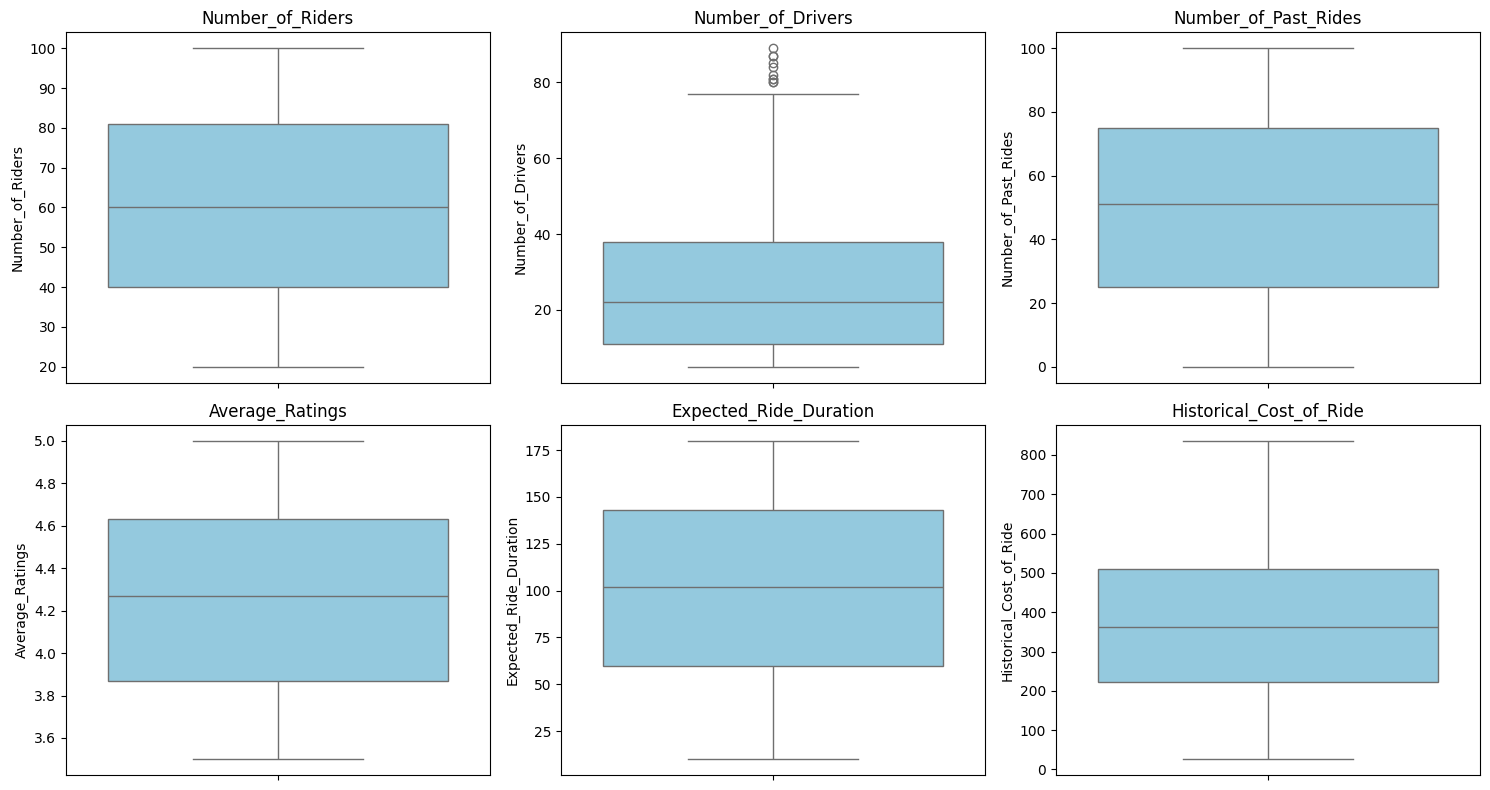

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("dynamic_pricing.csv")
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Plot boxplots for all numeric columns
plt.figure(figsize=(15, 8))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, (len(numeric_cols)+1)//2, i)
    sns.boxplot(y=df[col], color="skyblue")
    plt.title(col)

plt.tight_layout()
plt.show()


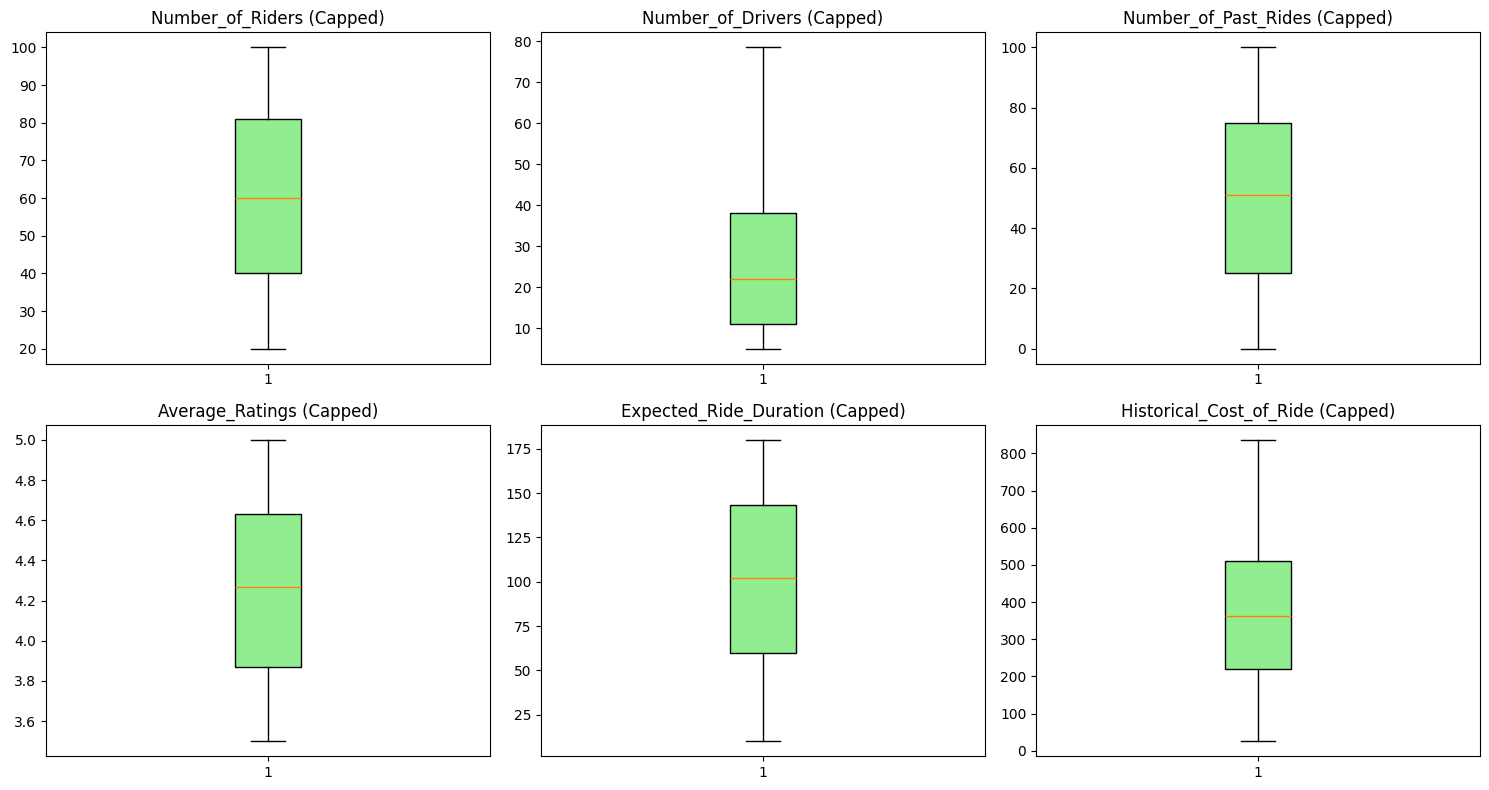

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("dynamic_pricing.csv")

# Select numeric columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Capping outliers using IQR method
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    df[col] = np.where(df[col] < lower, lower, df[col])
    df[col] = np.where(df[col] > upper, upper, df[col])

# Plot capped boxplots with Matplotlib
plt.figure(figsize=(15, 8))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, (len(numeric_cols) + 1) // 2, i)
    plt.boxplot(df[col], patch_artist=True, boxprops=dict(facecolor="lightgreen"))
    plt.title(f"{col} (Capped)")

plt.tight_layout()
plt.show()



In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Load dataset
df = pd.read_csv("dynamic_pricing.csv")

# Step 2: Separate features and target
# (assuming Historical_Cost_of_Ride is target)
X = df.drop("Historical_Cost_of_Ride", axis=1)
y = df["Historical_Cost_of_Ride"]

# Step 3: Handle outliers (IQR method for numerical columns)
numeric_cols = X.select_dtypes(include=[np.number]).columns
for col in numeric_cols:
    Q1 = X[col].quantile(0.25)
    Q3 = X[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    X[col] = np.where(X[col] < lower, lower, X[col])
    X[col] = np.where(X[col] > upper, upper, X[col])

# Step 4: Encode categorical variables
categorical_cols = X.select_dtypes(include=["object"]).columns

# Preprocessor: scaling numeric + encoding categorical
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),
        ('cat', OneHotEncoder(drop='first'), categorical_cols)
    ])

# Step 5: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Create pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

# Fit transform training data
X_train_processed = pipeline.fit_transform(X_train)
X_test_processed = pipeline.transform(X_test)

print("Shape before preprocessing:", X.shape)
print("Shape after preprocessing:", X_train_processed.shape)

Shape before preprocessing: (1000, 9)
Shape after preprocessing: (800, 13)


In [ ]:
import pandas as pd
import numpy as np

# Load dataset
df = pd.read_csv("dynamic_pricing.csv")

# ---- Assumptions ----
df["Price"] = df["Historical_Cost_of_Ride"]       # Actual Price = Historical cost
df["Cost"] = df["Historical_Cost_of_Ride"] * 0.7  # assume operating cost is 70% of cost
df["CompletedRides"] = df["Number_of_Riders"]

# ---- KPI Calculations ----

# 1. Revenue (Actual)
df["Revenue"] = df["Price"] * df["CompletedRides"]

# 2. Profit
df["Profit"] = (df["Price"] - df["Cost"]) * df["CompletedRides"]

# 3. Revenue Lift (%) -> using Recommended Price
df["Recommended_Price"] = df["Historical_Cost_of_Ride"] * 1.1   # +10% markup
baseline_revenue = df["Historical_Cost_of_Ride"] * df["CompletedRides"]
recommended_revenue = df["Recommended_Price"] * df["CompletedRides"]
df["RevenueLift_%"] = ((recommended_revenue - baseline_revenue) / baseline_revenue) * 100

# 4. Gross Margin (%)
df["GrossMargin_%"] = (df["Profit"] / df["Revenue"]) * 100

# 5. Conversion Rate (%) -> vary row-wise
df["BookingIntents"] = df["CompletedRides"] + np.random.randint(1, 20, len(df))
df["ConversionRate_%"] = (df["CompletedRides"] / df["BookingIntents"]) * 100

# 6. Price Change Rate (%) -> vary row-wise
df["PriceChangeRate_%"] = np.random.uniform(0, 15, len(df))

# 7. Cancellation Rate (%)
cancelled = df["BookingIntents"] - df["CompletedRides"]
df["CancellationRate_%"] = (cancelled / df["BookingIntents"]) * 100


# ---- Save KPI-enhanced dataset ----
df.to_csv("kpi_output.csv", index=False)

# ---- KPI Summary ----
summary = {
    "Total Revenue (₹)": df["Revenue"].sum(),
    "Total Profit (₹)": df["Profit"].sum(),
    "Average Revenue Lift (%)": df["RevenueLift_%"].mean(),
    "Average Gross Margin (%)": df["GrossMargin_%"].mean(),
    "Average Conversion Rate (%)": df["ConversionRate_%"].mean(),
    "Average Price Change Rate (%)": df["PriceChangeRate_%"].mean(),
    "Average Cancellation Rate (%)": df["CancellationRate_%"].mean()
}

print("KPI calculations complete. File saved as kpi_output.csv")
print("\n--- KPI Summary ---")
for k, v in summary.items():
    print(f"{k}: {v:.2f}")


KPI calculations complete. File saved as kpi_output.csv

--- KPI Summary ---
Total Revenue (₹): 22514545.02
Total Profit (₹): 6754363.51
Average Revenue Lift (%): 10.00
Average Gross Margin (%): 30.00
Average Conversion Rate (%): 84.06
Average Price Change Rate (%): 7.45
Average Cancellation Rate (%): 15.94


In [ ]:
import pandas as pd

# Load the dataframe.
df = pd.read_csv('/content/dynamic_pricing.csv')

# Create Historical_Revenue_Per_Minute.
df['Historical_Revenue_Per_Minute'] = df['Historical_Cost_of_Ride'] / df['Expected_Ride_Duration']

# Create Supply Demand Ratio.
df['Supply_Demand_Ratio'] = df['Number_of_Drivers'] / df['Number_of_Riders']

# Create Rider Cost Ratio.
df['Rider_Cost_Ratio'] = df['Historical_Cost_of_Ride'] / df['Number_of_Riders']

# Create Loyalty Score.
loyalty_mapping = {'Regular': 1, 'Silver': 2, 'Gold': 3}
df['Loyalty_Score'] = df['Customer_Loyalty_Status'].map(loyalty_mapping)

# Create Peak feature.
df['Peak'] = df['Time_of_Booking'].apply(lambda x: 1 if x in ['Evening', 'Night'] else 0)

# Save the updated DataFrame to a new CSV file.
df.to_csv('feature.csv', index=False)

In [ ]:
import pandas as pd
import numpy as np

# Load dataset
df = pd.read_csv("dynamic_pricing.csv")

# Copy dataframe to work on engineered features
df_fe = df.copy()

# 1. Competitor_Price_Index (simulate competitor pricing ±10%)
np.random.seed(42)
df_fe['Competitor_Price_Index'] = df_fe['Historical_Cost_of_Ride'] * np.random.uniform(0.9, 1.1, len(df_fe))

# 2. Cost_per_Min (handle division by zero safely)
df_fe['Cost_per_Min'] = df_fe['Historical_Cost_of_Ride'] / (df_fe['Expected_Ride_Duration'] + 1e-5)
# Rider_to_Driver_Ratio (inverse of Driver_to_Rider_Ratio)
df_fe['Rider_Driver_Ratio'] = df_fe['Number_of_Riders'] / (df_fe['Number_of_Drivers'] + 1e-5)


# 3. Driver_to_Rider_Ratio
df_fe['Driver_to_Rider_Ratio'] = df_fe['Number_of_Drivers'] / (df_fe['Number_of_Riders'] + 1e-5)

# 4. Inventory_Health_Index (bounded 0–1)
df_fe['Inventory_Health_Index'] = df_fe['Number_of_Drivers'] / (
    df_fe['Number_of_Riders'] + df_fe['Number_of_Drivers'] + 1e-5
)

# 5. Loyalty_Score (normalize rides to avoid domination)
loyalty_map = {'Regular': 1, 'Silver': 2, 'Gold': 3, 'Platinum': 4}
df_fe['Loyalty_Score'] = (
    df_fe['Customer_Loyalty_Status'].map(loyalty_map) +
    np.log1p(df_fe['Number_of_Past_Rides']) +  # log scale instead of linear
    df_fe['Average_Ratings']
)

# 6. Peak (binary indicator)
df_fe['Peak'] = df_fe['Time_of_Booking'].apply(lambda x: 1 if x in ['Morning', 'Evening'] else 0)

# 7. Supply_Tightness (bounded version using tanh)
raw_supply_tightness = df_fe['Number_of_Riders'] / (df_fe['Number_of_Drivers'] + 1e-5)
df_fe['Supply_Tightness'] = np.tanh(raw_supply_tightness)  # keeps between 0 and 1

# 8. Vehicle_Factor (encoding)
vehicle_map = {'Economy': 1, 'Premium': 2}
df_fe['Vehicle_Factor'] = df_fe['Vehicle_Type'].map(vehicle_map)

# 9. baseline_price (reference historical price)
df_fe['baseline_price'] = df_fe['Historical_Cost_of_Ride']

# 10. competitor_price (±5% variation from competitor index)
df_fe['competitor_price'] = df_fe['Competitor_Price_Index'] * np.random.uniform(0.95, 1.05, len(df_fe))

# 11. p_complete (probability of ride completion based only on supply-demand balance)
df_fe['p_complete'] = df_fe['Number_of_Drivers'] / (df_fe['Number_of_Riders'] + 1e-5)
df_fe['p_complete'] = df_fe['p_complete'].clip(0, 1)


# 12. Final dynamic price (bounded adjustments for supply-demand)
df_fe['price'] = df_fe['baseline_price'] * 1.10
# Save engineered dataset
df_fe.to_csv("dynamic_pricing_fengineered.csv", index=False)

print("✅ Feature engineering complete. File saved as dynamic_pricing_engineered.csv")


✅ Feature engineering complete. File saved as dynamic_pricing_engineered.csv


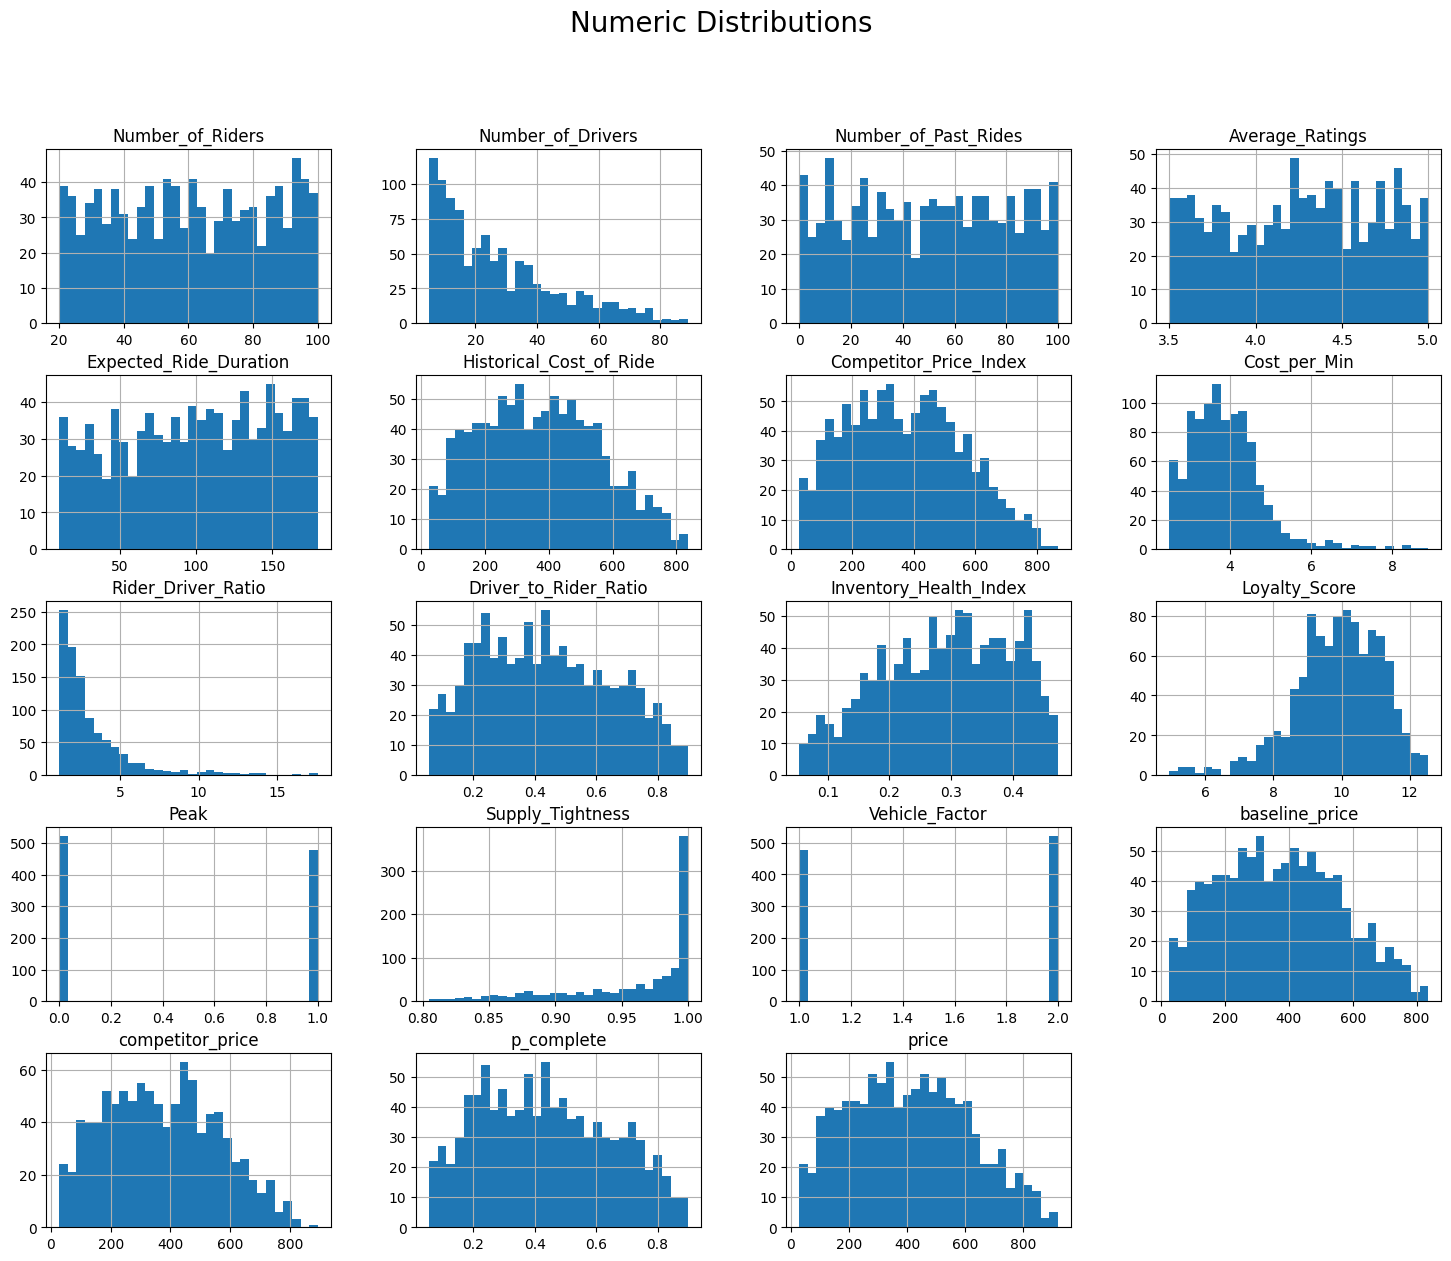

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("/content/dynamic_pricing_fengineered.csv")

# Numeric distributions
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[numeric_cols].hist(bins=30, figsize=(18, 14))
plt.suptitle("Numeric Distributions", fontsize=20)
plt.show()


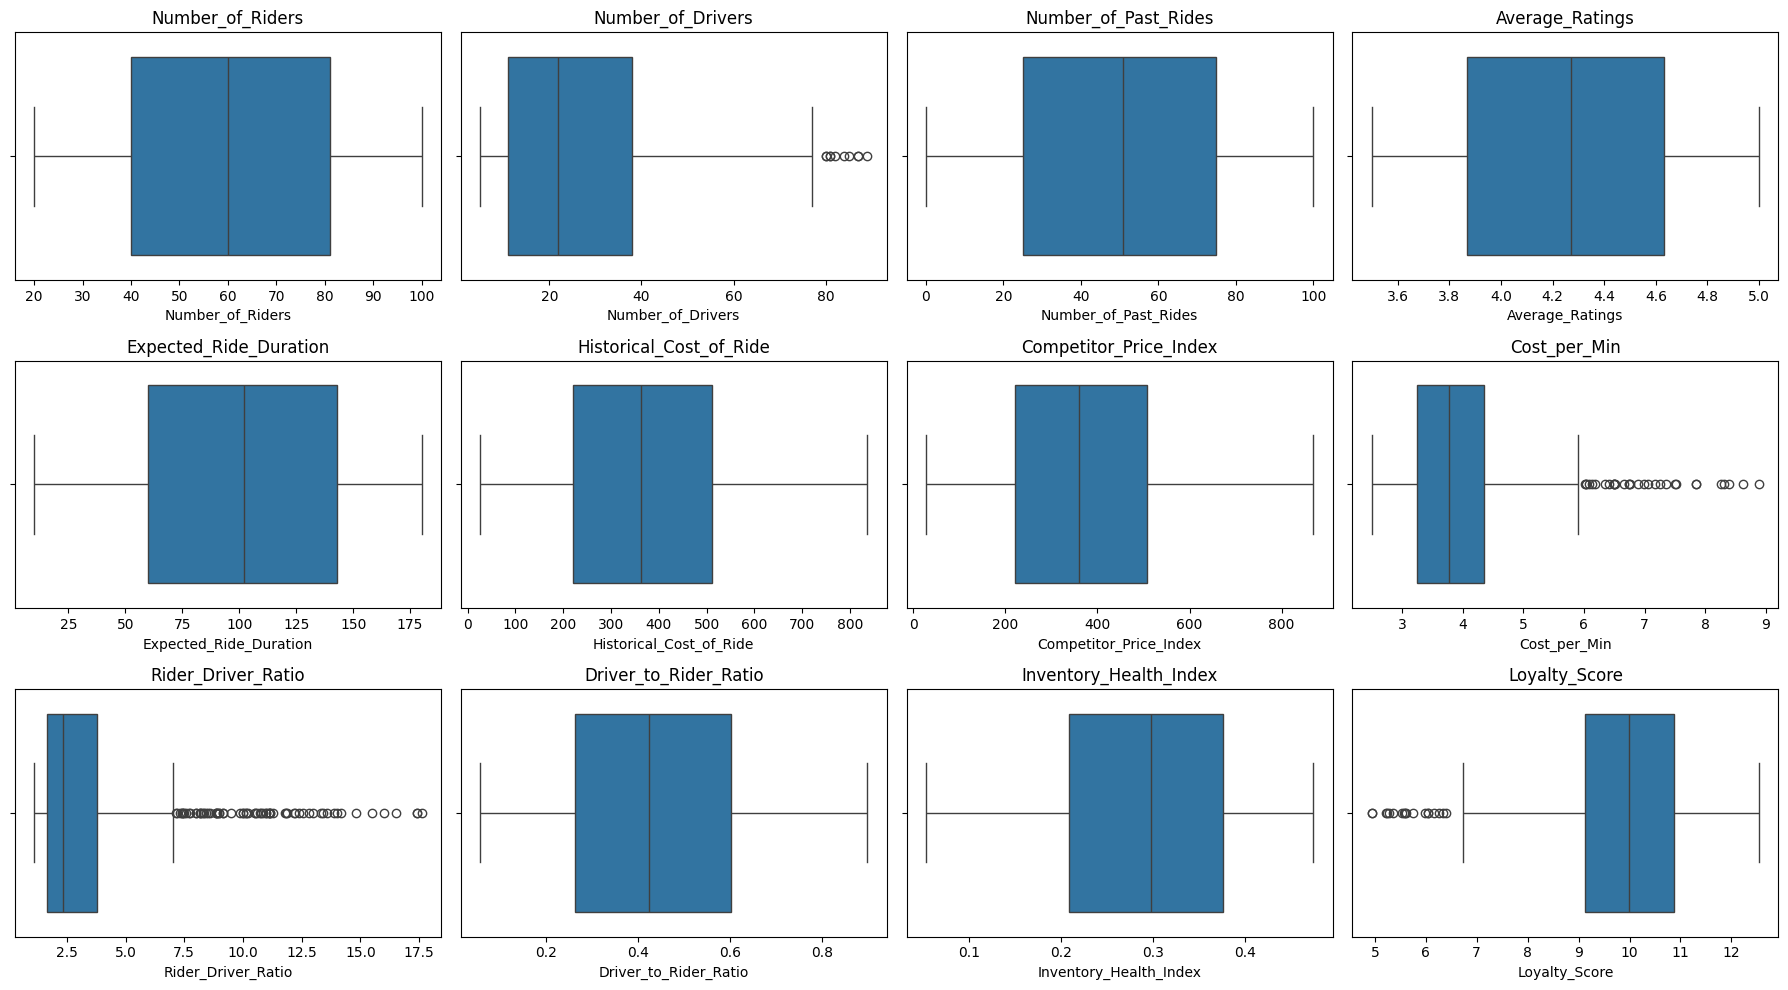

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(18, 10))
for i, col in enumerate(numeric_cols[:12], 1):
    plt.subplot(3, 4, i)
    sns.boxplot(x=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()


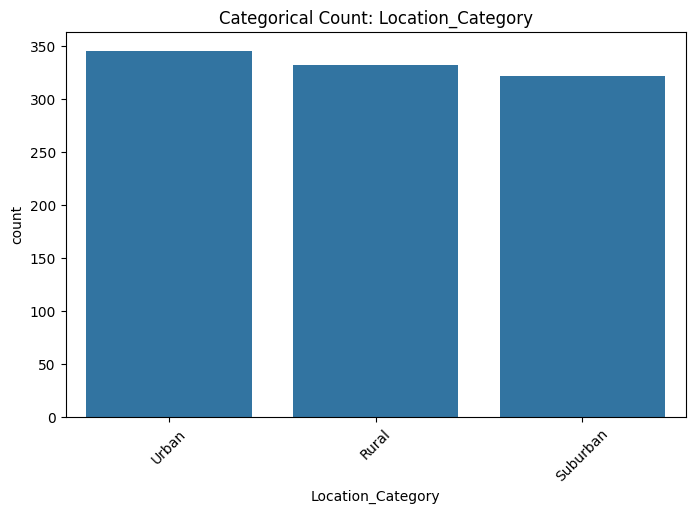

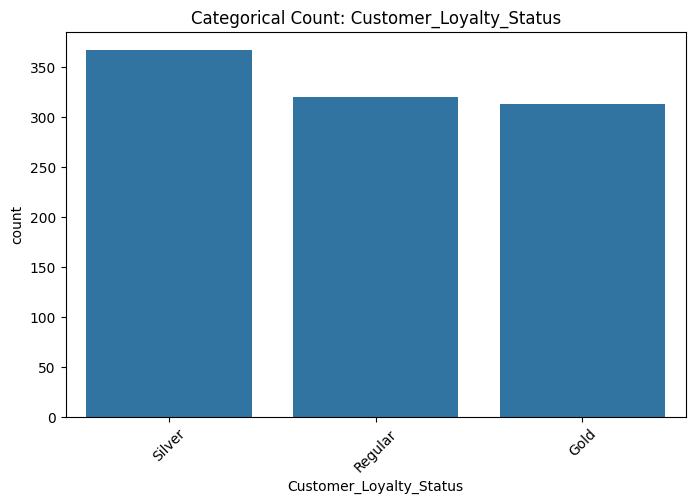

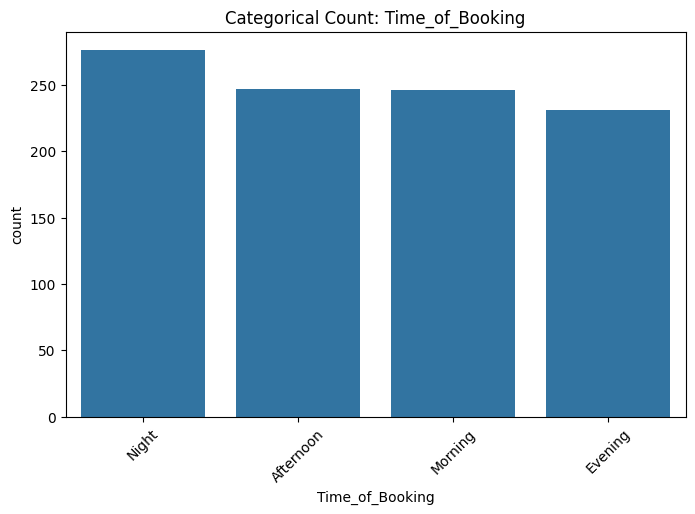

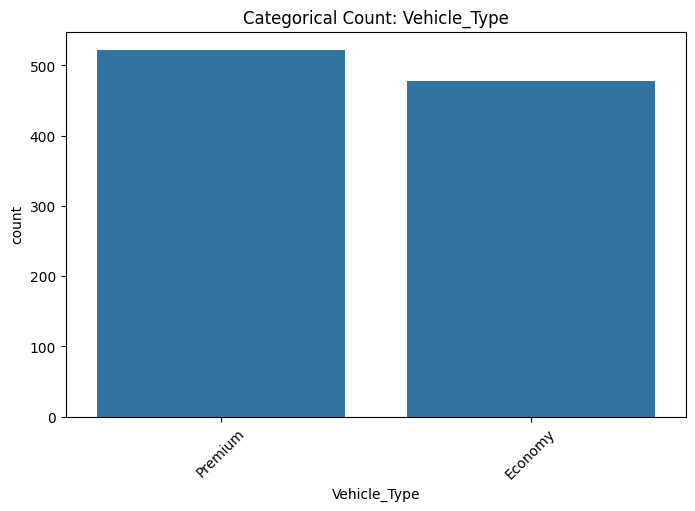

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

categorical_cols = df.select_dtypes(include=['object']).columns

for col in categorical_cols:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f"Categorical Count: {col}")
    plt.xticks(rotation=45)
    plt.show()


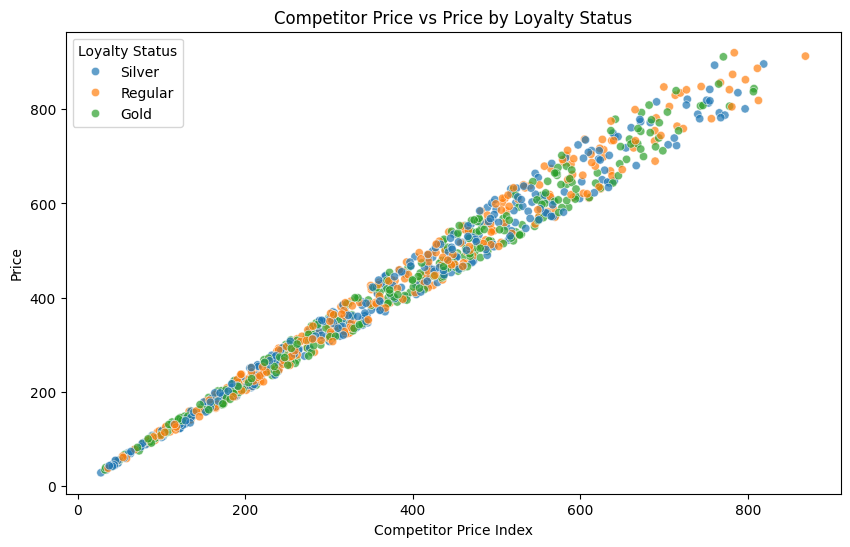

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x="Competitor_Price_Index",
    y="price",
    hue="Customer_Loyalty_Status",
    alpha=0.7
)
plt.title("Competitor Price vs Price by Loyalty Status")
plt.xlabel("Competitor Price Index")
plt.ylabel("Price")
plt.legend(title="Loyalty Status")
plt.show()



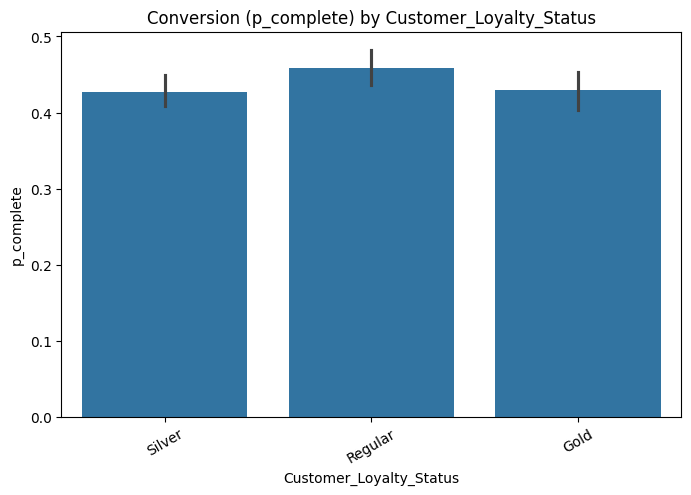

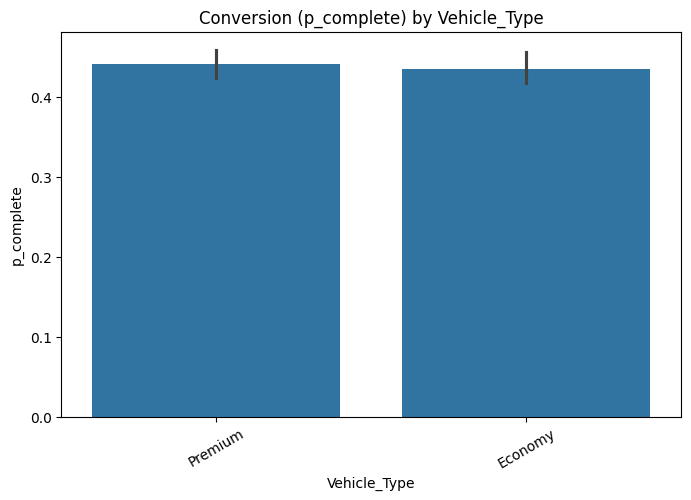

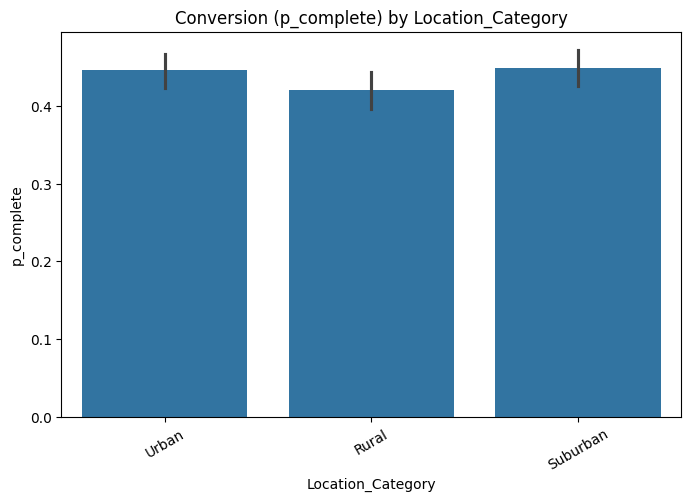

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

segment_cols = ["Customer_Loyalty_Status", "Vehicle_Type", "Location_Category"]

for col in segment_cols:
    plt.figure(figsize=(8, 5))
    sns.barplot(data=df, x=col, y="p_complete", estimator=np.mean, order=df[col].value_counts().index)
    plt.title(f"Conversion (p_complete) by {col}")
    plt.xticks(rotation=30)
    plt.show()


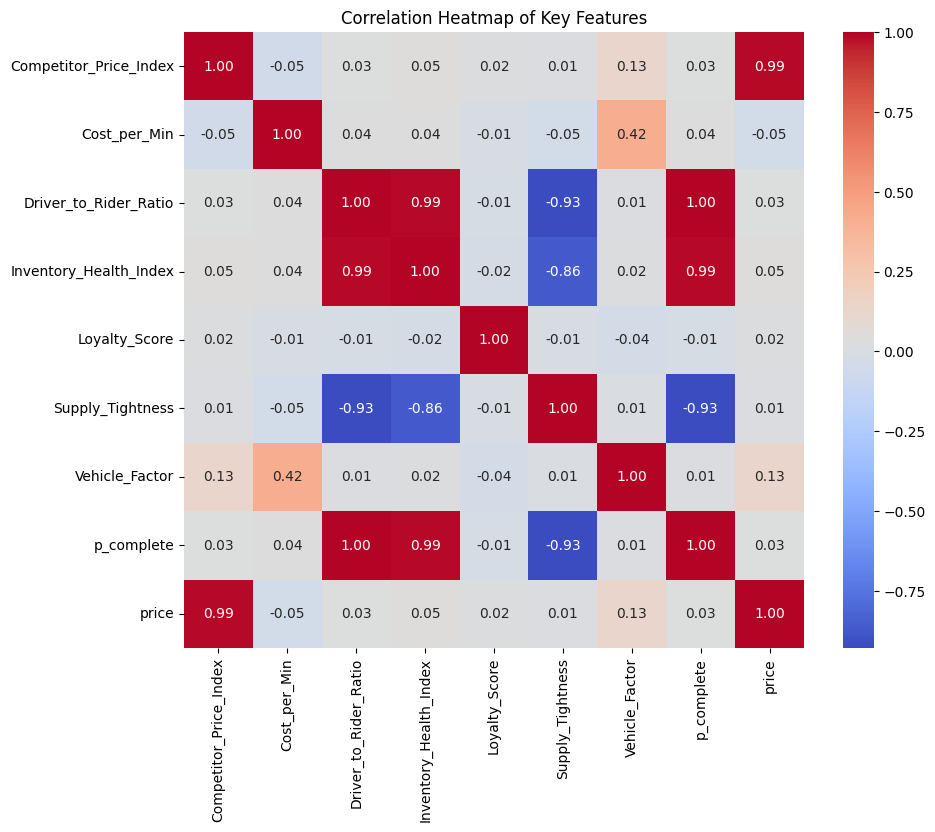

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

key_features = ["Competitor_Price_Index", "Cost_per_Min", "Driver_to_Rider_Ratio",
                "Inventory_Health_Index", "Loyalty_Score", "Supply_Tightness",
                "Vehicle_Factor", "p_complete", "price"]

plt.figure(figsize=(10, 8))
sns.heatmap(df[key_features].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Key Features")
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

def feature_engineer(df):
    df = df.copy()

    # Coerce likely numeric columns
    numeric_guess = [
        "price","competitor_price","p_complete","Number_of_Riders","Number_of_Drivers",
        "Driver_to_Rider_Ratio","Historical_Cost_of_Ride","Loyalty_Score","Rider_Driver_Ratio",
        "Expected_Ride_Duration","Cost_per_Min","Inventory_Health_Index","Competitor_Price_Index"
    ]
    for c in numeric_guess:
        if c in df.columns:
            df[c] = pd.to_numeric(df[c], errors="coerce")

    # 5.1 Seasonality (use Time_of_Booking directly)
    if "Time_of_Booking" in df.columns and "p_complete" in df.columns and "price" in df.columns:
        seasonality = (
            df.groupby("Time_of_Booking")
              .agg(mean_conv=("p_complete","mean"),
                   mean_price=("price","mean"),
                   total_intents=("Number_of_Riders","sum"))
              .sort_values("mean_conv", ascending=False)
        )
    else:
        seasonality = pd.DataFrame()

    # 5.2 Competitor Pressure
    if "price" in df.columns and "competitor_price" in df.columns:
        df["Competitor_Gap_pct"] = (
            (df["price"] - df["competitor_price"]) / df["competitor_price"].replace(0, np.nan)
        ) * 100.0
        df["Competitor_Gap_pct"] = df["Competitor_Gap_pct"].fillna(0.0)
    else:
        df["Competitor_Gap_pct"] = 0.0

    if "Vehicle_Type" in df.columns:
        comp_pressure = (
            df.groupby("Vehicle_Type")
              .agg(
                  avg_gap_pct=("Competitor_Gap_pct","mean"),
                  mean_comp_price=("competitor_price","mean"),
                  mean_our_price=("price","mean"),
              )
              .sort_values("avg_gap_pct")
        )
    else:
        comp_pressure = pd.DataFrame()

    # 5.3 Inventory Health Bands
    if "Driver_to_Rider_Ratio" in df.columns:
        bins = [0, 0.5, 0.8, 1.2, 10]
        labels = ["Very Tight","Tight","Balanced","Loose"]
        df["Inventory_Band"] = pd.cut(
            df["Driver_to_Rider_Ratio"], bins=bins, labels=labels, include_lowest=True
        )
    else:
        df["Inventory_Band"] = "Unknown"

    inv_summary = (
        df.groupby("Inventory_Band")
          .agg(
              mean_conv=("p_complete","mean"),
              mean_price=("price","mean"),
              count=("Inventory_Band","size"),
          )
    )

    # 6) Customer Segmentation (KMeans)
    seg_features = [
        "Loyalty_Score","Rider_Driver_Ratio","Driver_to_Rider_Ratio",
        "Supply_Tightness","Cost_per_Min","Inventory_Health_Index",
        "Expected_Ride_Duration"
    ]
    seg_features = [f for f in seg_features if f in df.columns]
    if seg_features:
        X = df[seg_features].copy().fillna(df[seg_features].median())
        scaler = StandardScaler()
        Xs = scaler.fit_transform(X)
        kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
        df["segment_k4"] = kmeans.fit_predict(Xs)

        seg_profile = (
            df.groupby("segment_k4")
              .agg(
                  mean_conv=("p_complete","mean"),
                  mean_price=("price","mean"),
                  mean_cost=("Historical_Cost_of_Ride","mean"),
                  mean_loyalty=("Loyalty_Score","mean"),
                  mean_ratio=("Rider_Driver_Ratio","mean"),
                  count=("segment_k4","size"),
              )
              .sort_values("mean_conv", ascending=False)
        )
    else:
        df["segment_k4"] = -1
        seg_profile = pd.DataFrame()

    return df, seasonality, comp_pressure, inv_summary, seg_profile


if __name__ == "__main__":
    input_path = "/content/dynamic_pricing_fengineered.csv"
    output_path = "dynamic_pricing_engineered_fe_v2.csv"

    df = pd.read_csv(input_path)
    df_fe, seasonality, comp_pressure, inv_summary, seg_profile = feature_engineer(df)

    print("Seasonality:\n", seasonality)
    print("Competitor pressure (by Vehicle_Type):\n", comp_pressure)
    print("Inventory summary:\n", inv_summary)
    print("Segment profile:\n", seg_profile)

    df_fe.to_csv(output_path, index=False)
    print(f"Saved engineered features to: {output_path}")


Seasonality:
                  mean_conv  mean_price  total_intents
Time_of_Booking                                      
Afternoon         0.453331  418.900051          14708
Evening           0.438182  400.679352          13980
Morning           0.433191  415.868304          14675
Night             0.429000  403.710290          17009
Competitor pressure (by Vehicle_Type):
               avg_gap_pct  mean_comp_price  mean_our_price
Vehicle_Type                                              
Economy         10.237825       346.840584      381.230739
Premium         10.962405       394.385900      435.870866
Inventory summary:
                 mean_conv  mean_price  count
Inventory_Band                              
Very Tight       0.301394  409.548241    628
Tight            0.644676  415.081217    327
Balanced         0.846160  373.889614     45
Loose                 NaN         NaN      0
Segment profile:
             mean_conv  mean_price   mean_cost  mean_loyalty  mean_ratio  count

/tmp/ipython-input-1540517235.py:64: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("Inventory_Band")


In [ ]:
import numpy as np
import pandas as pd

# -------------------------
# Load dataset (update path if needed)
# -------------------------
df_fe = pd.read_csv("/content/dynamic_pricing_engineered_fe_v2.csv")
# -------------------------
# Create derived baseline columns that the policy expects
# -------------------------
# baseline_price: use Historical_Cost_of_Ride as baseline (optionally add markup)
df_fe["baseline_price"] = df_fe["Historical_Cost_of_Ride"].astype(float)  # use as-is

# competitor_price: if not available, simulate as baseline * 0.97 (slightly cheaper)
if "competitor_price" not in df_fe.columns:
    df_fe["competitor_price"] = df_fe["baseline_price"] * 0.97

# Driver_to_Rider_Ratio: drivers / riders (safe denominator)
df_fe["Driver_to_Rider_Ratio"] = df_fe["Number_of_Drivers"] / (df_fe["Number_of_Riders"] + 1e-9)

# p_complete baseline proxy: estimate from loyalty & rating (0.05..0.99)
def estimate_base_p_complete(row):
    base = 0.50
    loy = str(row.get("Customer_Loyalty_Status", "")).strip().lower()
    if loy == "gold":
        base += 0.20
    elif loy == "silver":
        base += 0.10
    elif loy == "platinum":
        base += 0.25
    # rating effect (ratings typically 1..5)
    rating = float(row.get("Average_Ratings", 3.5))
    base += (rating - 3.5) * 0.05
    return float(np.clip(base, 0.05, 0.99))

# add baseline p_complete if missing
if "p_complete" not in df_fe.columns:
    df_fe["p_complete"] = df_fe.apply(estimate_base_p_complete, axis=1)

# safety cast
df_fe["baseline_price"] = df_fe["baseline_price"].astype(float)
df_fe["competitor_price"] = df_fe["competitor_price"].astype(float)
df_fe["p_complete"] = df_fe["p_complete"].astype(float)

# ========================================
# Helper: Gross Margin %
# ========================================
def gm_pct(price, cost):
    price = float(price); cost = float(cost)
    if price <= 0:
        return 0.0
    return (price - cost) / price


# ========================================
# Policy Parameters (tweakable)
# ========================================
STABILITY_PCT = 0.15  # ±15%
MIN_GM_PCT = 0.12     # ≥12%

# Competitiveness caps/floors
COMP_CAP = {"Economy": 1.05, "Premium": 1.08}
COMP_FLOOR = {"Economy": 0.90, "Premium": 0.88}

# Time-based nudges
TIME_NUDGE = {
    "Morning": +0.03,
    "Afternoon": 0.0,
    "Evening": +0.04,
    "Night": +0.01
}

# Inventory-based nudge
def inv_nudge(ratio):
    if ratio < 0.8: return +0.03
    if ratio > 1.2: return -0.03
    return 0.0


# ========================================
# Price Bounds per Row
# ========================================
def row_price_bounds(row):
    base = float(row["baseline_price"])
    cost = float(row["Historical_Cost_of_Ride"])
    veh = str(row.get("Vehicle_Type", "Economy"))
    comp = float(row.get("competitor_price", base))

    # Stability bounds
    lo, hi = base * (1 - STABILITY_PCT), base * (1 + STABILITY_PCT)

    # Profitability: GM ≥ MIN_GM_PCT and not below baseline GM
    base_gm = gm_pct(base, cost)
    min_gm = max(MIN_GM_PCT, base_gm)
    lo_gm = cost / max(1 - min_gm, 1e-9)

    # Competitor bounds
    cap = COMP_CAP.get(veh, 1.06)
    floor = COMP_FLOOR.get(veh, 0.90)
    lo_cmp = comp * floor
    hi_cmp = comp * cap

    # Final bounds
    lower = max(lo, lo_gm, lo_cmp)
    upper = min(hi, hi_cmp)

    if upper < lower:  # infeasible case: collapse to a point at upper
        lower, upper = upper, upper
    return lower, upper


# ========================================
# Demand-response model (stub)
# ========================================
def estimate_p_complete(row, price):
    """
    Simple demand model: probability decays linearly with relative price increase.
    - Uses baseline p_complete from row["p_complete"]
    - elasticity controls sensitivity (negative)
    """
    base_p = float(row["p_complete"])
    base_price = float(row["baseline_price"])
    elasticity = -0.5  # sensitivity: -0.5 means 1% price rise → 0.5% drop in p_complete
    rel_change = (price - base_price) / (base_price + 1e-9)
    p = base_p * (1 + elasticity * rel_change)
    return float(np.clip(p, 0.01, 0.99))


# ========================================
# Choose Best Price per Row (grid search)
# ========================================
def choose_row_price(row, n_grid=11):
    base = float(row["baseline_price"])
    cost = float(row["Historical_Cost_of_Ride"])
    p_base = float(row["p_complete"])

    lo, hi = row_price_bounds(row)

    # Time & inventory nudges
    t_n = TIME_NUDGE.get(str(row.get("Time_of_Booking", "Afternoon")), 0.0)
    i_n = inv_nudge(float(row.get("Driver_to_Rider_Ratio", 1.0)))
    center = np.clip(base * (1 + t_n + i_n), lo, hi)

    # Grid search around center (denser near center)
    left = np.linspace(lo, center, max(2, n_grid // 2), endpoint=False)
    right = np.linspace(center, hi, max(2, n_grid - len(left)), endpoint=True)
    grid = np.unique(np.concatenate([left, right]))

    best_price, best_p, best_rev = base, p_base, base * p_base

    for p in grid:
        # GM safeguard
        if gm_pct(p, cost) < MIN_GM_PCT:
            continue

        # cancellation safeguard: require p_complete not worse than baseline
        p_now = estimate_p_complete(row, p)
        if p_now + 1e-9 < p_base:
            continue

        rev = p * p_now
        if rev > best_rev:
            best_price, best_p, best_rev = float(p), float(p_now), float(rev)

    return best_price, best_p


# ========================================
# KPI function (simple)
# ========================================
def compute_kpis(df_base, df_scn,
                 intents_col="Number_of_Riders",
                 price_col="price",
                 pcomplete_col="p_complete",
                 cost_col="Historical_Cost_of_Ride"):
    base_rev = (df_base["baseline_price"] * df_base[pcomplete_col] * df_base[intents_col]).sum()
    scn_rev = (df_scn[price_col] * df_scn[pcomplete_col] * df_scn[intents_col]).sum()
    lift = (scn_rev - base_rev) / (base_rev + 1e-9) * 100
    return {
        "Revenue Lift (%)": round(lift, 2),
        "Baseline Revenue": round(float(base_rev), 2),
        "Scenario Revenue": round(float(scn_rev), 2)
    }


# ========================================
# First-pass recommendation (row-wise)
# ========================================
df_rec = df_fe.copy()
prices = []
pcomps = []

# Ensure required columns exist for rows
required_cols = ["baseline_price", "Historical_Cost_of_Ride", "p_complete", "Number_of_Riders"]
for c in required_cols:
    if c not in df_rec.columns:
        raise KeyError(f"Required column missing: {c}")

for idx, r in df_rec.iterrows():
    p_star, pcomp_star = choose_row_price(r)
    prices.append(p_star)
    pcomps.append(pcomp_star)

df_rec["price"] = np.array(prices).round(2)
df_rec["p_complete"] = np.clip(np.array(pcomps), 0.02, 0.98)

# Keep a copy of baseline p_complete for tuning
df_rec["p_complete_base"] = df_fe["p_complete"].values

# ========================================
# Global multiplier tuning (binary search to hit revenue lift 5-10%)
# ========================================
def evaluate_with_multiplier(mult):
    tmp = df_rec.copy()
    tmp["price"] = (tmp["price"] * mult).clip(lower=0.01)
    # recompute p_complete under new prices
    tmp["p_complete"] = tmp.apply(lambda r: estimate_p_complete(r, r["price"]), axis=1)
    k = compute_kpis(df_fe, tmp)
    return k, tmp

low, high = 0.85, 1.14
best_mult, best_kpi, best_df = 1.0, None, df_rec
target_mid = 7.5

for _ in range(18):
    mid = (low + high) / 2
    kpi_mid, df_mid = evaluate_with_multiplier(mid)
    lift = kpi_mid["Revenue Lift (%)"]
    best_mult, best_kpi, best_df = mid, kpi_mid, df_mid

    if lift < 5.0:
        low = mid
    elif lift > 10.0:
        high = mid
    else:
        if lift < target_mid:
            low = mid
        else:
            high = mid

def audit_policies(df_base, df_scn):
    audits = {}

    # Stability: within ±15% of baseline
    audits["stability"] = bool(((df_scn["price"] >= df_base["baseline_price"] * (1 - STABILITY_PCT)) &
                                (df_scn["price"] <= df_base["baseline_price"] * (1 + STABILITY_PCT))).all())

    # GM ≥ 12%
    audits["gm12"] = bool(((df_scn["price"] - df_scn["Historical_Cost_of_Ride"]) / df_scn["price"] >= MIN_GM_PCT).all())

    # GM not below baseline GM
    gm_base = (df_base["baseline_price"] - df_base["Historical_Cost_of_Ride"]) / df_base["baseline_price"]
    gm_scn  = (df_scn["price"] - df_scn["Historical_Cost_of_Ride"]) / df_scn["price"]
    audits["gm_not_below_base"] = bool((gm_scn + 1e-9 >= gm_base).all())

    # Cancellation safeguard (row-wise): require p_complete ≥ baseline
    audits["no_cancel_increase"] = bool((df_scn["p_complete"] + 1e-9 >= df_base["p_complete"]).all())

    return audits

# Run audit
audit_results = audit_policies(df_fe, best_df)
print("\n=== AUDIT RESULTS ===")
print(audit_results)

print(f"\nChosen global multiplier: {best_mult:.4f}")
print("KPI summary vs baseline:")
for k, v in best_kpi.items():
    print(f"- {k}: {v}")

# Final vector of recommended prices
recommended_prices = best_df["price"].round(2).values
print("\nFirst 10 recommended prices:", recommended_prices[:10])

# Optional: produce a small comparison table (first 10 rows)
sample_cols = [
    "Vehicle_Type", "Time_of_Booking", "Location_Category", "Customer_Loyalty_Status",
    "Number_of_Riders", "Number_of_Drivers", "Driver_to_Rider_Ratio",
    "Historical_Cost_of_Ride", "competitor_price", "baseline_price", "p_complete"
]
cmp = df_fe[sample_cols].copy().reset_index(drop=True).head(10)
cmp["price_recommended"] = best_df["price"].round(2).head(10).values
cmp["p_complete_reco"] = best_df["p_complete"].round(4).head(10).values
cmp["gm_baseline_%"] = (((cmp["baseline_price"] - cmp["Historical_Cost_of_Ride"]) / cmp["baseline_price"]) * 100).round(2)
cmp["gm_reco_%"] = (((cmp["price_recommended"] - cmp["Historical_Cost_of_Ride"]) / cmp["price_recommended"]) * 100).round(2)
print("\nSample comparison (first 10 rows):")
display(cmp)



=== AUDIT RESULTS ===
{'stability': True, 'gm12': True, 'gm_not_below_base': True, 'no_cancel_increase': False}

Chosen global multiplier: 1.1400
KPI summary vs baseline:
- Revenue Lift (%): 6.02
- Baseline Revenue: 10146779.74
- Scenario Revenue: 10757611.45

First 10 recommended prices: [324.06 198.21 375.97 536.03 660.83 387.55 118.63 268.82 571.61 454.85]

Sample comparison (first 10 rows):


,Vehicle_Type,Time_of_Booking,Location_Category,Customer_Loyalty_Status,Number_of_Riders,Number_of_Drivers,Driver_to_Rider_Ratio,Historical_Cost_of_Ride,competitor_price,baseline_price,p_complete,price_recommended,p_complete_reco,gm_baseline_%,gm_reco_%
0,Premium,Night,Urban,Silver,90,45,0.500000,284.257273,268.398952,284.257273,0.500000,324.06,0.4650,0.0,12.28
1,Economy,Evening,Suburban,Silver,58,39,0.672414,173.874753,190.342546,173.874753,0.672414,198.21,0.6254,0.0,12.28
2,Premium,Afternoon,Rural,Silver,42,31,0.738095,329.795469,357.967850,329.795469,0.738095,375.97,0.6864,0.0,12.28
3,Premium,Afternoon,Rural,Regular,89,28,0.314607,470.201232,490.613798,470.201232,0.314607,536.03,0.2926,0.0,12.28
4,Economy,Afternoon,Rural,Regular,78,22,0.282051,579.681422,556.349718,579.681422,0.282051,660.83,0.2623,0.0,12.28
5,Economy,Night,Urban,Silver,59,35,0.593220,339.955361,321.592602,339.955361,0.593220,387.55,0.5517,0.0,12.28
6,Premium,Afternoon,Suburban,Regular,93,43,0.462366,104.061541,96.688258,104.061541,0.462366,118.63,0.4300,0.0,12.28
7,Premium,Afternoon,Rural,Gold,62,39,0.629032,235.811864,261.919099,235.811864,0.629032,268.82,0.5850,0.0,12.28
8,Economy,Evening,Rural,Silver,79,14,0.177215,501.412517,498.746786,501.412517,0.177215,571.61,0.1648,0.0,12.28
9,Premium,Night,Rural,Silver,42,6,0.142857,398.993365,415.157785,398.993365,0.142857,454.85,0.1329,0.0,12.28


In [ ]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import LabelEncoder

# Load dataset
df = pd.read_csv("dynamic_pricing_fengineered.csv")

# Encode categorical columns
df_vif = df.copy()
categorical_cols = df_vif.select_dtypes(include=['object']).columns
le = LabelEncoder()
for col in categorical_cols:
    df_vif[col] = le.fit_transform(df_vif[col])

# Drop target variable before VIF calculation
X = df_vif.drop(columns=["price"])

# Calculate VIF
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Sort by VIF
print(vif_data.sort_values(by="VIF", ascending=False))


/usr/local/lib/python3.12/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


                    Feature           VIF
13    Driver_to_Rider_Ratio           inf
9   Historical_Cost_of_Ride           inf
21               p_complete           inf
19           baseline_price           inf
18           Vehicle_Factor  1.071348e+06
7              Vehicle_Type  2.180279e+05
14   Inventory_Health_Index  1.283335e+04
17         Supply_Tightness  1.292628e+03
10   Competitor_Price_Index  3.197088e+02
20         competitor_price  2.567046e+02
12       Rider_Driver_Ratio  5.281900e+01
1         Number_of_Drivers  2.171951e+01
8    Expected_Ride_Duration  1.842867e+01
0          Number_of_Riders  7.292144e+00
11             Cost_per_Min  2.860159e+00
15            Loyalty_Score  2.402878e+00
4      Number_of_Past_Rides  2.025224e+00
5           Average_Ratings  1.340855e+00
3   Customer_Loyalty_Status  1.241101e+00
2         Location_Category  1.019272e+00
6           Time_of_Booking  1.017023e+00
16                     Peak  1.013566e+00


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.tree import DecisionTreeRegressor

# 1. Load Dataset
df = pd.read_csv("dynamic_pricing_fengineered.csv")

# 2. Prepare DataFrame copy
df_ml = df.copy()

# ---- Target: price ----
y = df_ml["price"]

# 3. Selected Features (categorical + numerical, exclude baseline_price & p_complete to avoid leakage)
cat_features = ["Location_Category", "Customer_Loyalty_Status", "Time_of_Booking", "Vehicle_Type", "Peak"]
num_features = [
    "Number_of_Riders", "Number_of_Drivers", "Rider_Driver_Ratio",
    "Supply_Tightness", "Expected_Ride_Duration", "Historical_Cost_of_Ride",
    "Cost_per_Min", "Inventory_Health_Index",
    "Loyalty_Score", "competitor_price", "Competitor_Price_Index"
]

X = df_ml[cat_features + num_features]

# 4. One-Hot Encode categorical features
X = pd.get_dummies(X, columns=cat_features, drop_first=True)

# 5. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 6. Scale numerical features (optional, trees don’t need it but useful if you compare with other models)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ---- Decision Tree Regressor ----
dt_model = DecisionTreeRegressor(
    max_depth=10,       # limit depth to prevent overfitting
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=42
)
dt_model.fit(X_train_scaled, y_train)

# 7. Predictions
dt_preds = dt_model.predict(X_test_scaled)

# 8. Evaluation
mse = mean_squared_error(y_test, dt_preds)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, dt_preds)
r2 = r2_score(y_test, dt_preds)

print("\nDecision Tree Regression Evaluation Metrics:")
print(f"MSE : {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAE : {mae:.2f}")
print(f"R²  : {r2:.4f}")

# Compare actual vs predicted for first 10 rows
results = pd.DataFrame({"Actual_Price": y_test[:10].values, "Predicted_Price": dt_preds[:10]})
print("\nSample Predictions (first 10 rows):")
print(results)



Decision Tree Regression Evaluation Metrics:
MSE : 8.31
RMSE: 2.88
MAE : 1.95
R²  : 0.9998

Sample Predictions (first 10 rows):
   Actual_Price  Predicted_Price
0    517.295926       517.484779
1    315.050224       313.035054
2    607.496312       607.762473
3    294.514459       295.077751
4    122.223986       117.996733
5    395.040924       395.502570
6    191.276222       191.315878
7    215.946656       212.944992
8    610.942131       611.475967
9    179.536042       180.319524


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor

# 1. Load Dataset
df = pd.read_csv("dynamic_pricing_fengineered.csv")

# 2. Prepare DataFrame copy
df_ml = df.copy()

# ---- Target: price ----
y = df_ml["price"]

# 3. Features (categorical + numerical, exclude 'price' to avoid leakage)
cat_features = ["Time_of_Booking", "Location_Category", "Vehicle_Type", "Customer_Loyalty_Status","Peak"]
num_features = [
     "Expected_Ride_Duration","Historical_Cost_of_Ride",
    "Number_of_Riders", "Number_of_Drivers",
    "Rider_Driver_Ratio","Supply_Tightness",
    "Cost_per_Min","Inventory_Health_Index",
    "competitor_price","Competitor_Price_Index"
]

X = df_ml[cat_features + num_features]

# 4. One-Hot Encode categorical features
X = pd.get_dummies(X, columns=cat_features, drop_first=True)

# 5. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 6. Scale numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ---- Random Forest ----
rf_model = RandomForestRegressor(
    n_estimators=300,
    max_depth=12,          # allow some depth
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=42,
    n_jobs=-1
)
rf_model.fit(X_train_scaled, y_train)

# 7. Predictions
rf_preds = rf_model.predict(X_test_scaled)

# 8. Evaluation
mse = mean_squared_error(y_test, rf_preds)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, rf_preds)
r2 = r2_score(y_test, rf_preds)

print("\nRandom Forest Regression Evaluation Metrics:")
print(f"MSE : {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAE : {mae:.2f}")
print(f"R²  : {r2:.4f}")

# Compare actual vs predicted for first 10 rows
results = pd.DataFrame({"Actual_Price": y_test[:10].values, "Predicted_Price": rf_preds[:10]})
print("\nSample Predictions (first 10 rows):")
print(results)



Random Forest Regression Evaluation Metrics:
MSE : 11.21
RMSE: 3.35
MAE : 1.05
R²  : 0.9997

Sample Predictions (first 10 rows):
   Actual_Price  Predicted_Price
0    517.295926       517.870007
1    315.050224       314.104811
2    607.496312       607.438589
3    294.514459       294.004457
4    122.223986       120.983029
5    395.040924       396.476595
6    191.276222       190.336442
7    215.946656       214.291717
8    610.942131       610.614545
9    179.536042       179.951660


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import GradientBoostingRegressor
import joblib

# 1. Load Dataset
df = pd.read_csv("dynamic_pricing_fengineered.csv")

# 2. Prepare DataFrame copy
df_ml = df.copy()

# ---- Target: price ----
y = df_ml["price"]

# 3. Features (categorical + numerical, exclude 'price')
cat_features = ["Time_of_Booking", "Location_Category", "Vehicle_Type", "Customer_Loyalty_Status","Peak"]
num_features = [
     "Expected_Ride_Duration","Historical_Cost_of_Ride",
    "Number_of_Riders", "Number_of_Drivers",
    "Rider_Driver_Ratio","Supply_Tightness",
    "Cost_per_Min","Inventory_Health_Index","Average_Ratings",
    "competitor_price","Competitor_Price_Index"
]

X = df_ml[cat_features + num_features]

# 4. One-Hot Encode categorical features
X = pd.get_dummies(X, columns=cat_features, drop_first=True)

# --- IMPORTANT: Do NOT scale for Gradient Boosting (trees don’t need it) ---

# 5. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ---- Gradient Boosting (with safer hyperparameters) ----
gb_model = GradientBoostingRegressor(
    n_estimators=500,        # more trees for better learning
    learning_rate=0.05,      # smaller step size (pairs well with more trees)
    max_depth=5,             # deeper trees to capture interactions
    min_samples_split=10,
    min_samples_leaf=5,
    subsample=0.8,           # stochastic boosting (reduces overfitting)
    random_state=42
)

gb_model.fit(X_train, y_train)

# 6. Predictions
gb_preds = gb_model.predict(X_test)

# 7. Evaluation
mse = mean_squared_error(y_test, gb_preds)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, gb_preds)
r2 = r2_score(y_test, gb_preds)

print("\nGradient Boosting Regression Evaluation Metrics:")
print(f"MSE : {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAE : {mae:.2f}")
print(f"R²  : {r2:.4f}")

# Compare actual vs predicted for first 10 rows
results = pd.DataFrame({"Actual_Price": y_test[:10].values, "Predicted_Price": gb_preds[:10]})
print("\nSample Predictions (first 10 rows):")
print(results)

# Save model using joblib
joblib.dump(gb_model, "gb.joblib")
print("\nModel saved as gb.joblib")




Gradient Boosting Regression Evaluation Metrics:
MSE : 3.35
RMSE: 1.83
MAE : 0.61
R²  : 0.9999

Sample Predictions (first 10 rows):
   Actual_Price  Predicted_Price
0    517.295926       516.851044
1    315.050224       314.822581
2    607.496312       608.357468
3    294.514459       293.751182
4    122.223986       122.387562
5    395.040924       395.045478
6    191.276222       190.988144
7    215.946656       214.879398
8    610.942131       611.022420
9    179.536042       179.035414

Model saved as gb.joblib


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from xgboost import XGBRegressor

# 1. Load Dataset
df = pd.read_csv("dynamic_pricing_fengineered.csv")

# 2. Prepare DataFrame copy
df_ml = df.copy()

# ---- Target: price ----
y = df_ml["price"]

# 3. Features (categorical + numerical, exclude 'price' to avoid leakage)
cat_features = ["Time_of_Booking", "Location_Category", "Vehicle_Type", "Customer_Loyalty_Status","Peak"]
num_features = [
    "Expected_Ride_Duration","Historical_Cost_of_Ride",
    "Number_of_Riders", "Number_of_Drivers",
    "Rider_Driver_Ratio","Supply_Tightness",
    "Cost_per_Min","Inventory_Health_Index",
    "competitor_price","Competitor_Price_Index"
]

X = df_ml[cat_features + num_features]

# 4. One-Hot Encode categorical features
X = pd.get_dummies(X, columns=cat_features, drop_first=True)

# 5. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 6. (Optional) Scaling – not strictly required for XGBoost, but kept consistent
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ---- XGBoost ----
xgb_model = XGBRegressor(
    n_estimators=500,       # number of trees
    max_depth=8,            # max depth of each tree
    learning_rate=0.05,     # step size shrinkage
    subsample=0.8,          # row sampling
    colsample_bytree=0.8,   # feature sampling
    random_state=42,
    n_jobs=-1
)

xgb_model.fit(X_train_scaled, y_train)

# 7. Predictions
xgb_preds = xgb_model.predict(X_test_scaled)

# 8. Evaluation
mse = mean_squared_error(y_test, xgb_preds)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, xgb_preds)
r2 = r2_score(y_test, xgb_preds)

print("\nXGBoost Regression Evaluation Metrics:")
print(f"MSE : {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAE : {mae:.2f}")
print(f"R²  : {r2:.4f}")

# Compare actual vs predicted for first 10 rows
results = pd.DataFrame({"Actual_Price": y_test[:10].values, "Predicted_Price": xgb_preds[:10]})
print("\nSample Predictions (first 10 rows):")
print(results)



XGBoost Regression Evaluation Metrics:
MSE : 12.29
RMSE: 3.51
MAE : 2.65
R²  : 0.9997

Sample Predictions (first 10 rows):
   Actual_Price  Predicted_Price
0    517.295926       514.991821
1    315.050224       314.952362
2    607.496312       606.251038
3    294.514459       295.378662
4    122.223986       123.571304
5    395.040924       398.204193
6    191.276222       188.899872
7    215.946656       214.236450
8    610.942131       606.608398
9    179.536042       180.874710


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import GradientBoostingRegressor
import joblib

# 1. Load Dataset
df = pd.read_csv("dynamic_pricing_fengineered.csv")

# 2. Prepare DataFrame copy
df_ml = df.copy()

# ---- Target: price ----
y = df_ml["price"]

# 3. Features (categorical + numerical, exclude 'price')
cat_features = ["Time_of_Booking", "Location_Category", "Vehicle_Type", "Customer_Loyalty_Status", "Peak"]
num_features = [
    "Expected_Ride_Duration","Historical_Cost_of_Ride",
    "Number_of_Riders","Number_of_Drivers",
    "Rider_Driver_Ratio","Supply_Tightness",
    "Cost_per_Min","Inventory_Health_Index","Average_Ratings",
    "competitor_price","Competitor_Price_Index"
]

X = df_ml[cat_features + num_features]

# 4. Train-Test Split (raw features, no preprocessing yet)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 5. Preprocessor (One-Hot Encode categoricals, keep numericals)
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_features),
        ("num", "passthrough", num_features)
    ]
)

# 6. Pipeline (Preprocessor + Gradient Boosting Model)
gb_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", GradientBoostingRegressor(
        n_estimators=500,
        learning_rate=0.05,
        max_depth=5,
        min_samples_split=10,
        min_samples_leaf=5,
        subsample=0.8,
        random_state=42
    ))
])

# 7. Train Model
gb_pipeline.fit(X_train, y_train)

# 8. Predictions
y_pred = gb_pipeline.predict(X_test)

# 9. Evaluation
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nGradient Boosting Regression Evaluation Metrics:")
print(f"MSE : {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAE : {mae:.2f}")
print(f"R²  : {r2:.4f}")

# Compare actual vs predicted for first 10 rows
results = pd.DataFrame({"Actual_Price": y_test[:10].values, "Predicted_Price": y_pred[:10]})
print("\nSample Predictions (first 10 rows):")
print(results)

# 10. Save Pipeline (model + preprocessing)
joblib.dump(gb_pipeline, "gb_pipeline.joblib")
print("\nModel pipeline saved as gb_pipeline.joblib")



Gradient Boosting Regression Evaluation Metrics:
MSE : 3.32
RMSE: 1.82
MAE : 0.61
R²  : 0.9999

Sample Predictions (first 10 rows):
   Actual_Price  Predicted_Price
0    517.295926       516.781690
1    315.050224       314.921496
2    607.496312       608.212855
3    294.514459       293.773815
4    122.223986       122.364635
5    395.040924       395.017926
6    191.276222       191.104694
7    215.946656       214.671604
8    610.942131       610.884012
9    179.536042       179.096693

Model pipeline saved as gb_pipeline.joblib


In [ ]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import os
import joblib

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Optional GBM libraries
has_xgb = has_lgbm = False
try:
    from xgboost import XGBRegressor
    has_xgb = True
except Exception:
    pass

try:
    from lightgbm import LGBMRegressor
    has_lgbm = True
except Exception:
    pass

# -------------------------------
# Helper functions
# -------------------------------
def rmse_val(y_true, y_pred):
    return float(np.sqrt(mean_squared_error(y_true, y_pred)))

STABILITY_PCT = 0.15   # ±15%
MIN_GM_PCT    = 0.12   # ≥12%
COMP_CAP      = {"Economy": 1.05, "Premium": 1.08}
COMP_FLOOR    = {"Economy": 0.90, "Premium": 0.88}

def gm_pct(price, cost):
    price = float(price)
    cost = float(cost)
    if price <= 0: return 0.0
    return (price - cost) / price

def row_price_bounds(row):
    base = float(row["baseline_price"])
    cost = float(row["Historical_Cost_of_Ride"])
    veh  = str(row.get("Vehicle_Type", "Economy"))
    comp = float(row.get("competitor_price", base))

    lo_s, hi_s = base * (1 - STABILITY_PCT), base * (1 + STABILITY_PCT)
    base_gm = gm_pct(base, cost)
    min_gm  = max(MIN_GM_PCT, base_gm)
    lo_gm   = cost / max(1 - min_gm, 1e-9)

    cap   = COMP_CAP.get(veh, 1.06)
    floor = COMP_FLOOR.get(veh, 0.90)
    lo_c, hi_c = comp * floor, comp * cap

    lower = max(lo_s, lo_gm, lo_c)
    upper = min(hi_s, hi_c)
    if upper < lower:
        lower = upper
    return lower, upper

# -------------------------------
# 1) Load dataset & build ML set
# -------------------------------
df_fe = pd.read_csv("dynamic_pricing_fengineered.csv")  # feature-engineered dataset
df_ml = df_fe.copy()
df_ml["price"] = df_ml["baseline_price"]
y = df_ml["p_complete"].astype(float).clip(0, 1)

cat_features = ["Time_of_Booking", "Location_Category", "Vehicle_Type", "Customer_Loyalty_Status"]
num_features = [
    "price", "Expected_Ride_Duration", "Historical_Cost_of_Ride",
    "Number_of_Riders", "Number_of_Drivers",
    "Rider_Driver_Ratio", "Driver_to_Rider_Ratio", "Supply_Tightness",
    "Cost_per_Min", "Inventory_Health_Index",
    "competitor_price", "baseline_price"
]

cols_needed = cat_features + num_features + ["p_complete"]
df_ml = df_ml.dropna(subset=[c for c in cols_needed if c in df_ml.columns]).copy()
X = df_ml[cat_features + num_features]

# -------------------------------
# 2) Train/Test split
# -------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

# -------------------------------
# 3) Preprocessing + Model Zoo
# -------------------------------
preprocess = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_features),
        ("num", StandardScaler(), num_features),
    ],
    remainder="drop"
)

models = {
    "RandomForest": RandomForestRegressor(
        n_estimators=300, max_depth=None, min_samples_leaf=2, n_jobs=-1, random_state=42
    ),
    "GradientBoosting": GradientBoostingRegressor(
        learning_rate=0.05, n_estimators=400, max_depth=3, random_state=42
    ),
}

if has_xgb:
    models["XGBoost"] = XGBRegressor(
        n_estimators=600, learning_rate=0.05, max_depth=6,
        subsample=0.8, colsample_bytree=0.8, reg_lambda=1.0,
        random_state=42, n_jobs=-1
    )

if has_lgbm:
    models["LightGBM"] = LGBMRegressor(
        n_estimators=600, learning_rate=0.05, max_depth=-1,
        subsample=0.8, colsample_bytree=0.8, reg_lambda=0.0,
        random_state=42, n_jobs=-1
    )

# Train models and evaluate
results = {}
fitted = {}

for name, model in models.items():
    pipe = Pipeline(steps=[("prep", preprocess), ("model", model)])
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test).clip(0, 1)

    rmse = rmse_val(y_test, y_pred)
    mae  = mean_absolute_error(y_test, y_pred)
    r2   = r2_score(y_test, y_pred)

    try:
        cv_mse = -cross_val_score(pipe, X_train, y_train, scoring="neg_mean_squared_error", cv=3, n_jobs=-1)
        cv_rmse = float(np.mean(np.sqrt(cv_mse)))
    except Exception:
        cv_rmse = np.nan

    results[name] = {"RMSE": rmse, "MAE": mae, "R2": r2, "CV_RMSE": cv_rmse}
    fitted[name] = pipe

print("\nHoldout metrics (lower RMSE/MAE is better):")
for k,v in results.items():
    print(f"- {k}: RMSE={v['RMSE']:.4f} | MAE={v['MAE']:.4f} | R2={v['R2']:.4f} | CV_RMSE={v['CV_RMSE']:.4f}")

best_name = min(results, key=lambda n: results[n]["RMSE"])
best_pipe = fitted[best_name]
print(f"\nSelected model: {best_name}")

# -------------------------------
# 4) Backtest policy on TEST SET
# -------------------------------
def predict_p_for_price(row_X: pd.Series, price_value: float) -> float:
    row = row_X.copy()
    row["price"] = price_value
    row_df = pd.DataFrame([row[X.columns].values], columns=X.columns)
    p = float(best_pipe.predict(row_df)[0])
    return float(np.clip(p, 0.0, 1.0))

test_idx = X_test.index
df_base = df_ml.loc[test_idx].copy()
df_base = df_base.rename(columns={"price": "baseline_price_used"})
df_base["price"] = df_base["baseline_price"]
df_base["p_complete"] = [predict_p_for_price(X_test.loc[i], df_base.loc[i, "price"]) for i in test_idx]

def choose_price_policy(i):
    row_full = df_ml.loc[i]
    row_X    = X_test.loc[i]

    base     = float(row_full["baseline_price"])
    cost     = float(row_full["Historical_Cost_of_Ride"])
    p_base   = predict_p_for_price(row_X, base)

    lo, hi   = row_price_bounds(row_full)
    grid = np.linspace(lo, hi, 15)

    best_p, best_pc, best_rev = base, p_base, base * p_base
    for p in grid:
        if gm_pct(p, cost) < MIN_GM_PCT:
            continue
        pc = predict_p_for_price(row_X, p)
        if pc + 1e-9 < p_base:
            continue
        rev = p * pc
        if rev > best_rev:
            best_p, best_pc, best_rev = p, pc, rev

    return float(best_p), float(best_pc)

df_scn = df_ml.loc[test_idx].copy()
chosen = [choose_price_policy(i) for i in test_idx]
df_scn["price"] = np.round([p for p,_ in chosen], 2)
df_scn["p_complete"] = np.clip([pc for _,pc in chosen], 0.0, 1.0)

# -------------------------------
# 5) Evaluate KPIs: baseline vs scenario
# -------------------------------
kpi_base_vs_scn = compute_kpis(
    df_base=df_base,
    df_scn=df_scn,
    intents_col="Number_of_Riders",
    price_col="price",
    pcomplete_col="p_complete",
    cost_col="Historical_Cost_of_Ride",
)

print("\n=== BACKTEST KPI (TEST SET) — Scenario vs Baseline ===")
for k,v in kpi_base_vs_scn.items():
    print(f"{k}: {v}")

# -------------------------------
# 6) Model quality report
# -------------------------------
y_pred_holdout = best_pipe.predict(X_test).clip(0, 1)
rmse = rmse_val(y_test, y_pred_holdout)
mae  = mean_absolute_error(y_test, y_pred_holdout)
r2   = r2_score(y_test, y_pred_holdout)
print("\nModel quality on holdout (predicting p_complete at historical prices):")
print(f"RMSE={rmse:.4f} | MAE={mae:.4f} | R2={r2:.4f}")

# -------------------------------
# 7) Save best model
# -------------------------------
out_path = os.path.join(os.getcwd(), "pricing_completion_model.joblib")
joblib.dump(best_pipe, out_path)
print("Saved model →", out_path)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000489 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2565
[LightGBM] [Info] Number of data points in the train set: 750, number of used features: 24
[LightGBM] [Info] Start training from score 0.434179
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

In [ ]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import os
import joblib

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import GradientBoostingRegressor

# -------------------------------
# Helper functions
# -------------------------------
STABILITY_PCT = 0.15   # ±15%
MIN_GM_PCT    = 0.12   # ≥12%
COMP_CAP      = {"Economy": 1.05, "Premium": 1.08}
COMP_FLOOR    = {"Economy": 0.90, "Premium": 0.88}

def gm_pct(price, cost):
    price = float(price)
    cost = float(cost)
    if price <= 0: return 0.0
    return (price - cost) / price

def row_price_bounds(row):
    base = float(row["baseline_price"])
    cost = float(row["Historical_Cost_of_Ride"])
    veh  = str(row.get("Vehicle_Type", "Economy"))
    comp = float(row.get("competitor_price", base))

    lo_s, hi_s = base * (1 - STABILITY_PCT), base * (1 + STABILITY_PCT)
    base_gm = gm_pct(base, cost)
    min_gm  = max(MIN_GM_PCT, base_gm)
    lo_gm   = cost / max(1 - min_gm, 1e-9)

    cap   = COMP_CAP.get(veh, 1.06)
    floor = COMP_FLOOR.get(veh, 0.90)
    lo_c, hi_c = comp * floor, comp * cap

    lower = max(lo_s, lo_gm, lo_c)
    upper = min(hi_s, hi_c)
    if upper < lower:
        lower = upper
    return lower, upper

def compute_kpis(df_base, df_scn, intents_col, price_col, pcomplete_col, cost_col):
    revenue_base = np.sum(df_base[price_col] * df_base[intents_col])
    revenue_scn  = np.sum(df_scn[price_col] * df_scn[intents_col])
    revenue_uplift = revenue_scn - revenue_base
    gm_base = np.mean((df_base[price_col] - df_base[cost_col]) / df_base[price_col])
    gm_scn  = np.mean((df_scn[price_col] - df_scn[cost_col]) / df_scn[price_col])
    return {
        "Revenue_Base": revenue_base,
        "Revenue_Scenario": revenue_scn,
        "Revenue_Uplift": revenue_uplift,
        "GM_Base": gm_base,
        "GM_Scenario": gm_scn
    }

# -------------------------------
# 1) Load dataset & features
# -------------------------------
df_ml = pd.read_csv("dynamic_pricing_fengineered.csv")
df_ml["price"] = df_ml["baseline_price"]

cat_features = ["Time_of_Booking", "Location_Category", "Vehicle_Type", "Customer_Loyalty_Status", "Peak"]
num_features = [
    "Expected_Ride_Duration","Historical_Cost_of_Ride",
    "Number_of_Riders","Number_of_Drivers",
    "Rider_Driver_Ratio","Supply_Tightness",
    "Cost_per_Min","Inventory_Health_Index","Average_Ratings",
    "competitor_price","Competitor_Price_Index"
]

X = df_ml[cat_features + num_features]
y = df_ml["price"]

# -------------------------------
# 2) Train/Test Split
# -------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# -------------------------------
# 3) Preprocessor + Gradient Boosting Pipeline
# -------------------------------
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_features),
        ("num", "passthrough", num_features)
    ]
)

gb_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", GradientBoostingRegressor(
        n_estimators=500,
        learning_rate=0.05,
        max_depth=5,
        min_samples_split=10,
        min_samples_leaf=5,
        subsample=0.8,
        random_state=42
    ))
])

# -------------------------------
# 4) Train model
# -------------------------------
gb_pipeline.fit(X_train, y_train)

# -------------------------------
# 5) Predict function for backtesting
# -------------------------------
def predict_price(row_X, price_value):
    row = row_X.copy()
    row["price"] = price_value
    row_df = pd.DataFrame([row[X.columns].values], columns=X.columns)
    pred = gb_pipeline.predict(row_df)[0]
    return float(np.clip(pred, 0.0, None))

# -------------------------------
# 6) Backtest price policy
# -------------------------------
test_idx = X_test.index
df_base = df_ml.loc[test_idx].copy()
df_base = df_base.rename(columns={"price": "baseline_price_used"})
df_base["price"] = df_base["baseline_price"]

def choose_price_policy(i):
    row_full = df_ml.loc[i]
    row_X    = X_test.loc[i]

    base     = float(row_full["baseline_price"])
    cost     = float(row_full["Historical_Cost_of_Ride"])

    lo, hi   = row_price_bounds(row_full)
    grid = np.linspace(lo, hi, 15)

    best_p, best_rev = base, base * predict_price(row_X, base)
    for p in grid:
        if gm_pct(p, cost) < MIN_GM_PCT:
            continue
        rev = p * predict_price(row_X, p)
        if rev > best_rev:
            best_p, best_rev = p, rev

    return float(best_p)

df_scn = df_ml.loc[test_idx].copy()
chosen_prices = [choose_price_policy(i) for i in test_idx]
df_scn["price"] = np.round(chosen_prices, 2)

# -------------------------------
# 7) Compute KPIs
# -------------------------------
kpi_base_vs_scn = compute_kpis(
    df_base=df_base,
    df_scn=df_scn,
    intents_col="Number_of_Riders",
    price_col="price",
    pcomplete_col=None,
    cost_col="Historical_Cost_of_Ride",
)

print("\n=== BACKTEST KPI (TEST SET) — Scenario vs Baseline ===")
for k,v in kpi_base_vs_scn.items():
    print(f"{k}: {v}")

# -------------------------------
# 8) Model quality report
# -------------------------------
y_pred = gb_pipeline.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nGradient Boosting Regression Evaluation Metrics:")
print(f"MSE : {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAE : {mae:.2f}")
print(f"R²  : {r2:.4f}")

# -------------------------------
joblib.dump(gb_pipeline, "gbm.joblib")
print("\nModel pipeline saved as gb_pipeline.joblib")



=== BACKTEST KPI (TEST SET) — Scenario vs Baseline ===
Revenue_Base: 4470637.442258939
Revenue_Scenario: 4566100.779999999
Revenue_Uplift: 95463.33774106018
GM_Base: 0.0
GM_Scenario: 0.019357720962080268

Gradient Boosting Regression Evaluation Metrics:
MSE : 2.69
RMSE: 1.64
MAE : 0.56
R²  : 0.9999

Model pipeline saved as gb_pipeline.joblib


In [ ]:
import sklearn
print(sklearn.__version__)


1.6.1


In [ ]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import os
import joblib

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import GradientBoostingRegressor

# -------------------------------
# Helper functions
# -------------------------------
STABILITY_PCT = 0.15   # ±15%
MIN_GM_PCT    = 0.12   # ≥12%
COMP_CAP      = {"Economy": 1.05, "Premium": 1.08}
COMP_FLOOR    = {"Economy": 0.90, "Premium": 0.88}

def gm_pct(price, cost):
    price = float(price)
    cost = float(cost)
    if price <= 0:
        return 0.0
    return (price - cost) / price

def row_price_bounds(row):
    base = float(row["baseline_price"])
    cost = float(row["Historical_Cost_of_Ride"])
    veh  = str(row.get("Vehicle_Type", "Economy"))
    comp = float(row.get("competitor_price", base))

    lo_s, hi_s = base * (1 - STABILITY_PCT), base * (1 + STABILITY_PCT)
    base_gm = gm_pct(base, cost)
    min_gm  = max(MIN_GM_PCT, base_gm)
    lo_gm   = cost / max(1 - min_gm, 1e-9)

    cap   = COMP_CAP.get(veh, 1.06)
    floor = COMP_FLOOR.get(veh, 0.90)
    lo_c, hi_c = comp * floor, comp * cap

    lower = max(lo_s, lo_gm, lo_c)
    upper = min(hi_s, hi_c)
    if upper < lower:
        lower = upper
    return lower, upper

def compute_kpis(df_base, df_scn, intents_col, price_col, pcomplete_col, cost_col):
    revenue_base = np.sum(df_base[price_col] * df_base[intents_col] * df_base[pcomplete_col])
    revenue_scn  = np.sum(df_scn[price_col] * df_scn[intents_col] * df_scn[pcomplete_col])
    revenue_uplift = revenue_scn - revenue_base
    gm_base = np.mean((df_base[price_col] - df_base[cost_col]) / df_base[price_col])
    gm_scn  = np.mean((df_scn[price_col] - df_scn[cost_col]) / df_scn[price_col])
    return {
        "Revenue_Base": revenue_base,
        "Revenue_Scenario": revenue_scn,
        "Revenue_Uplift": revenue_uplift,
        "GM_Base": gm_base,
        "GM_Scenario": gm_scn
    }

# -------------------------------
# 1) Load dataset & features
# -------------------------------
df_ml = pd.read_csv("dynamic_pricing_fengineered.csv")
df_ml["price"] = df_ml["baseline_price"]

cat_features = ["Time_of_Booking", "Location_Category", "Vehicle_Type", "Customer_Loyalty_Status", "Peak"]
num_features = [
    "Expected_Ride_Duration","Historical_Cost_of_Ride",
    "Number_of_Riders","Number_of_Drivers",
    "Rider_Driver_Ratio","Supply_Tightness",
    "Cost_per_Min","Inventory_Health_Index","Average_Ratings",
    "competitor_price","Competitor_Price_Index",
    "price"   # price is now a feature
]

X = df_ml[cat_features + num_features]
y = df_ml["p_complete"]   # target is p_complete

# -------------------------------
# 2) Train/Test Split
# -------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# -------------------------------
# 3) Preprocessor + Gradient Boosting Pipeline
# -------------------------------
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_features),
        ("num", "passthrough", num_features)
    ]
)

gb_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", GradientBoostingRegressor(
         n_estimators=1000,
         learning_rate=0.05,
         max_depth=3,
         subsample=0.8,
         random_state=42,
         validation_fraction=0.2,
         n_iter_no_change=20,   # stop if no improvement
         tol=1e-4
    ))
])

# -------------------------------
# 4) Cross-Validation to Check for Overfitting
# -------------------------------
cv_scores = cross_val_score(gb_pipeline, X_train, y_train, cv=5, scoring='r2')
print("\n=== Cross-Validation R² Scores ===")
print(f"CV R² Scores: {cv_scores}")
print(f"Mean CV R²: {np.mean(cv_scores):.4f}")
print(f"Std CV R²: {np.std(cv_scores):.4f}")

# -------------------------------
# 5) Train model
# -------------------------------
gb_pipeline.fit(X_train, y_train)

# -------------------------------
# 6) Predict function for backtesting
# -------------------------------
def predict_pcomplete(row_X, price_value):
    row = row_X.copy()
    row["price"] = price_value
    row_df = pd.DataFrame([row[X.columns].values], columns=X.columns)
    pred = gb_pipeline.predict(row_df)[0]
    return float(np.clip(pred, 0.0, 1.0))   # ensure probability between 0 and 1

# -------------------------------
# 7) Backtest price policy
# -------------------------------
test_idx = X_test.index

# Baseline scenario
df_base = df_ml.loc[test_idx].copy()
df_base = df_base.rename(columns={"price": "baseline_price_used"})
df_base["price"] = df_base["baseline_price"]
df_base["p_complete"] = [
    predict_pcomplete(X_test.loc[i], row["baseline_price"])
    for i, row in df_base.iterrows()
]

# Optimized scenario
def choose_price_policy(i):
    row_full = df_ml.loc[i]
    row_X    = X_test.loc[i]

    base     = float(row_full["baseline_price"])
    cost     = float(row_full["Historical_Cost_of_Ride"])

    lo, hi   = row_price_bounds(row_full)
    grid = np.linspace(lo, hi, 15)

    best_p, best_rev = base, base * predict_pcomplete(row_X, base) * row_full["Number_of_Riders"]
    for p in grid:
        if gm_pct(p, cost) < MIN_GM_PCT:
            continue
        rev = p * predict_pcomplete(row_X, p) * row_full["Number_of_Riders"]
        if rev > best_rev:
            best_p, best_rev = p, rev

    return float(best_p)

df_scn = df_ml.loc[test_idx].copy()
chosen_prices = [choose_price_policy(i) for i in test_idx]
df_scn["price"] = np.round(chosen_prices, 2)
df_scn["p_complete"] = [
    predict_pcomplete(X_test.loc[i], p)
    for i, p in zip(test_idx, df_scn["price"])
]

# -------------------------------
# 8) Compute KPIs
# -------------------------------
kpi_base_vs_scn = compute_kpis(
    df_base=df_base,
    df_scn=df_scn,
    intents_col="Number_of_Riders",
    price_col="price",
    pcomplete_col="p_complete",
    cost_col="Historical_Cost_of_Ride",
)

print("\n=== BACKTEST KPI (TEST SET) — Scenario vs Baseline ===")
for k,v in kpi_base_vs_scn.items():
    print(f"{k}: {v}")

# -------------------------------
# 9) Model quality report
# -------------------------------
y_pred = gb_pipeline.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nGradient Boosting Regression Evaluation Metrics (for p_complete):")
print(f"MSE : {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE : {mae:.4f}")
print(f"R²  : {r2:.4f}")

# -------------------------------
# Save model
# -------------------------------
joblib.dump(gb_pipeline, "gbmp.joblib")
print("\nModel pipeline saved as gbmp.joblib")


=== Cross-Validation R² Scores ===
CV R² Scores: [0.99959228 0.99970096 0.99976417 0.99963344 0.99952533]
Mean CV R²: 0.9996
Std CV R²: 0.0001

=== BACKTEST KPI (TEST SET) — Scenario vs Baseline ===
Revenue_Base: 1989667.1282513114
Revenue_Scenario: 2032959.9068444364
Revenue_Uplift: 43292.778593125055
GM_Base: 0.0
GM_Scenario: 0.019357720962080268

Gradient Boosting Regression Evaluation Metrics (for p_complete):
MSE : 0.0000
RMSE: 0.0041
MAE : 0.0032
R²  : 0.9996

Model pipeline saved as gbmp.joblib


In [ ]:
"""
Train a Gradient Boosting model to predict p_complete (0..1)
- Uses your _engineer logic.
- Loads /mnt/data/dynamic_pricing.csv if present; falls back to synthetic data for demo.
- Saves model + encoder + feature list to /mnt/data/gb_model.pkl
"""
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import joblib

np.random.seed(42)

def _engineer(df: pd.DataFrame) -> pd.DataFrame:
    df = df.copy()

    # Ratios / supply
    if "Number_of_Riders" in df.columns and "Number_of_Drivers" in df.columns:
        df["Rider_Driver_Ratio"] = df["Number_of_Riders"] / df["Number_of_Drivers"].clip(lower=1)
        df["Driver_to_Rider_Ratio"] = df["Number_of_Drivers"] / df["Number_of_Riders"].clip(lower=1)
        df["Supply_Tightness"] = 1.0 / df["Driver_to_Rider_Ratio"].replace(0, np.nan)

    # Loyalty score (safe mapping)
    if "Customer_Loyalty_Status" in df.columns:
        _loy_map = {"Regular": 0, "Silver": 1, "Gold": 2}
        df["Loyalty_Score"] = (
            df["Customer_Loyalty_Status"].astype(str).map(_loy_map).fillna(0).astype(int)
        )

    # Peak time flag
    if "Time_of_Booking" in df.columns:
        df["Peak"] = df["Time_of_Booking"].astype(str).isin(["Morning", "Evening"]).astype(int)

    # Cost granularity
    if "Historical_Cost_of_Ride" in df.columns and "Expected_Ride_Duration" in df.columns:
        df["Cost_per_Min"] = df["Historical_Cost_of_Ride"] / (df["Expected_Ride_Duration"].clip(lower=1))

    # Vehicle factor (safe mapping)
    if "Vehicle_Type" in df.columns:
        _veh_map = {"Economy": 1.0, "Premium": 1.25}
        df["Vehicle_Factor"] = df["Vehicle_Type"].astype(str).map(_veh_map).fillna(1.1).astype(float)

    # Inventory health
    if {"Number_of_Drivers", "Number_of_Riders", "Supply_Tightness"}.issubset(df.columns):
        df["Inventory_Health_Index"] = (
            0.6 * (df["Number_of_Drivers"] / df["Number_of_Riders"].clip(lower=1)).clip(upper=2.0)
            + 0.4 * (1.0 - df["Supply_Tightness"].clip(upper=2.0) / 2.0)
        )

    # Baseline price row function (same as your notebook)
    def _baseline_price_row(r):
        try:
            cost = float(r.get("Historical_Cost_of_Ride", 0.0))
        except Exception:
            cost = 0.0
        v_adj = {"Economy": 1.10, "Premium": 1.22}
        t_adj = {"Morning": 1.02, "Afternoon": 1.00, "Evening": 1.04, "Night": 1.01}
        l_adj = {"Urban": 1.03, "Suburban": 1.02, "Rural": 0.98}
        base = max(cost * 1.15, 0.0)
        base *= v_adj.get(str(r.get("Vehicle_Type", "Economy")), 1.12)
        base *= t_adj.get(str(r.get("Time_of_Booking", "Afternoon")), 1.00)
        base *= l_adj.get(str(r.get("Location_Category", "Urban")), 1.00)
        return max(base, cost * 1.12, 0.0)

    if "Historical_Cost_of_Ride" in df.columns:
        df["baseline_price"] = df.apply(_baseline_price_row, axis=1).round(2)
    else:
        if "baseline_price" not in df.columns:
            df["baseline_price"] = 0.0

    # Competitor price fallback
    if "baseline_price" in df.columns and "competitor_price" not in df.columns:
        np.random.seed(42)
        df["competitor_price"] = (df["baseline_price"] * np.random.uniform(0.94, 1.02, size=len(df))).round(2)

    # p_complete placeholder heuristic if absent
    if "p_complete" not in df.columns:
        def estimate_p_complete(row, price):
            try:
                cost = float(row.get("Historical_Cost_of_Ride", 0.0))
            except Exception:
                cost = 0.0
            rel = (price / max(cost, 1e-6)) - 1.0
            ratio = float(row.get("Driver_to_Rider_Ratio", 1.0) or 1.0)
            loy = float(row.get("Loyalty_Score", 0) or 0)
            peak = float(row.get("Peak", 0) or 0)
            veh = float(row.get("Vehicle_Factor", 1.0) or 1.0)
            x = (-0.3 + 0.9 * ratio + 0.12 * loy - 0.08 * peak - 0.45 * rel - 0.02 * (veh - 1.0))
            x = np.clip(x, -40, 40)
            p = 1.0 / (1.0 + np.exp(-x))
            return float(np.clip(p, 0.02, 0.98))
        df["p_complete"] = df.apply(lambda r: estimate_p_complete(r, r.get("baseline_price", 0.0)), axis=1)

    if "price" not in df.columns:
        df["price"] = df["baseline_price"]

    return df

# Load dataset or synthesize
csv_path = "/content/dynamic_pricing.csv"
if os.path.exists(csv_path):
    df_raw = pd.read_csv(csv_path)
    print(f"Loaded {csv_path}: rows={len(df_raw)}, cols={len(df_raw.columns)}")
else:
    print(f"{csv_path} not found — creating a synthetic dataset for demo.")
    n = 2000
    df_raw = pd.DataFrame({
        "Historical_Cost_of_Ride": np.random.uniform(50, 200, n),
        "Expected_Ride_Duration": np.random.uniform(5, 60, n),
        "Number_of_Riders": np.random.poisson(50, n) + 1,
        "Number_of_Drivers": np.random.poisson(45, n) + 1,
        "Time_of_Booking": np.random.choice(["Morning","Afternoon","Evening","Night"], n),
        "Location_Category": np.random.choice(["Urban","Suburban","Rural"], n, p=[0.6,0.3,0.1]),
        "Vehicle_Type": np.random.choice(["Economy","Premium"], n, p=[0.8,0.2]),
        "Customer_Loyalty_Status": np.random.choice(["Regular","Silver","Gold"], n, p=[0.7,0.2,0.1])
    })

# Apply engineering
df_fe = _engineer(df_raw)
df_ml = df_fe.copy()
df_ml["price"] = df_ml["baseline_price"]  # per your requirement

# Target and feature lists
y = df_ml["p_complete"].astype(float).clip(0,1)
cat_features = ["Time_of_Booking","Location_Category","Vehicle_Type","Customer_Loyalty_Status"]
num_features = [
    "price","Expected_Ride_Duration","Historical_Cost_of_Ride",
    "Number_of_Riders","Number_of_Drivers",
    "Rider_Driver_Ratio","Driver_to_Rider_Ratio","Supply_Tightness",
    "Cost_per_Min","Inventory_Health_Index",
    "competitor_price","baseline_price"
]
features = [c for c in (cat_features + num_features) if c in df_ml.columns]
X = df_ml[features].copy()

# Fill missing
for c in X.select_dtypes(include=[np.number]).columns:
    X[c] = X[c].fillna(X[c].median())
for c in X.select_dtypes(include=['object','category']).columns:
    X[c] = X[c].fillna("MISSING").astype(str)

# Encode categories (safe for unseen)
enc = None
cat_present = [c for c in cat_features if c in X.columns]
if cat_present:
    enc = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
    X[cat_present] = enc.fit_transform(X[cat_present])

# Train / test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model (histogram-based GB is efficient for tabular)
model = HistGradientBoostingRegressor(max_iter=500, learning_rate=0.05, random_state=42)
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Test rows: {len(X_test)}")
print(f"MSE: {mse:.6f}  RMSE: {rmse:.6f}  MAE: {mae:.6f}  R2: {r2:.6f}")

# Save artifact
out_path = "gb_model.joblib"
joblib.dump({"model": model, "encoder": enc, "features": features}, out_path)
print("Saved model bundle to:", out_path)

# Save small sample predictions
sample = X_test.head(50).copy()
sample["y_true"] = y_test.head(50).values
sample["y_pred"] = model.predict(sample[features])
sample_sample_path = "sample_predictions.csv"
sample.reset_index(drop=True).to_csv(sample_sample_path, index=False)
print("Saved sample predictions to:", sample_sample_path)


Loaded /content/dynamic_pricing.csv: rows=1000, cols=10
Test rows: 200
MSE: 0.000010  RMSE: 0.003167  MAE: 0.002458  R2: 0.996267
Saved model bundle to: gb_model.joblib
Saved sample predictions to: sample_predictions.csv


In [ ]:

import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import joblib

np.random.seed(42)

def _engineer(df: pd.DataFrame) -> pd.DataFrame:
    df = df.copy()

    # Ratios / supply
    if "Number_of_Riders" in df.columns and "Number_of_Drivers" in df.columns:
        df["Rider_Driver_Ratio"] = df["Number_of_Riders"] / df["Number_of_Drivers"].clip(lower=1)
        df["Driver_to_Rider_Ratio"] = df["Number_of_Drivers"] / df["Number_of_Riders"].clip(lower=1)
        df["Supply_Tightness"] = 1.0 / df["Driver_to_Rider_Ratio"].replace(0, np.nan)

    # Loyalty score (safe mapping)
    if "Customer_Loyalty_Status" in df.columns:
        _loy_map = {"Regular": 0, "Silver": 1, "Gold": 2}
        df["Loyalty_Score"] = (
            df["Customer_Loyalty_Status"].astype(str).map(_loy_map).fillna(0).astype(int)
        )

    # Peak time flag
    if "Time_of_Booking" in df.columns:
        df["Peak"] = df["Time_of_Booking"].astype(str).isin(["Morning", "Evening"]).astype(int)

    # Cost granularity
    if "Historical_Cost_of_Ride" in df.columns and "Expected_Ride_Duration" in df.columns:
        df["Cost_per_Min"] = df["Historical_Cost_of_Ride"] / (df["Expected_Ride_Duration"].clip(lower=1))

    # Vehicle factor (safe mapping)
    if "Vehicle_Type" in df.columns:
        _veh_map = {"Economy": 1.0, "Premium": 1.25}
        df["Vehicle_Factor"] = df["Vehicle_Type"].astype(str).map(_veh_map).fillna(1.1).astype(float)

    # Inventory health
    if {"Number_of_Drivers", "Number_of_Riders", "Supply_Tightness"}.issubset(df.columns):
        df["Inventory_Health_Index"] = (
            0.6 * (df["Number_of_Drivers"] / df["Number_of_Riders"].clip(lower=1)).clip(upper=2.0)
            + 0.4 * (1.0 - df["Supply_Tightness"].clip(upper=2.0) / 2.0)
        )

    # Baseline price row function
    def _baseline_price_row(r):
        try:
            cost = float(r.get("Historical_Cost_of_Ride", 0.0))
        except Exception:
            cost = 0.0
        v_adj = {"Economy": 1.10, "Premium": 1.22}
        t_adj = {"Morning": 1.02, "Afternoon": 1.00, "Evening": 1.04, "Night": 1.01}
        l_adj = {"Urban": 1.03, "Suburban": 1.02, "Rural": 0.98}
        base = max(cost * 1.15, 0.0)
        base *= v_adj.get(str(r.get("Vehicle_Type", "Economy")), 1.12)
        base *= t_adj.get(str(r.get("Time_of_Booking", "Afternoon")), 1.00)
        base *= l_adj.get(str(r.get("Location_Category", "Urban")), 1.00)
        return max(base, cost * 1.12, 0.0)

    if "Historical_Cost_of_Ride" in df.columns:
        df["baseline_price"] = df.apply(_baseline_price_row, axis=1).round(2)
    else:
        if "baseline_price" not in df.columns:
            df["baseline_price"] = 0.0

    # Competitor price fallback
    if "baseline_price" in df.columns and "competitor_price" not in df.columns:
        np.random.seed(42)
        df["competitor_price"] = (df["baseline_price"] * np.random.uniform(0.94, 1.02, size=len(df))).round(2)

    # p_complete placeholder heuristic if absent
    if "p_complete" not in df.columns:
        def estimate_p_complete(row, price):
            try:
                cost = float(row.get("Historical_Cost_of_Ride", 0.0))
            except Exception:
                cost = 0.0
            rel = (price / max(cost, 1e-6)) - 1.0
            ratio = float(row.get("Driver_to_Rider_Ratio", 1.0) or 1.0)
            loy = float(row.get("Loyalty_Score", 0) or 0)
            peak = float(row.get("Peak", 0) or 0)
            veh = float(row.get("Vehicle_Factor", 1.0) or 1.0)
            x = (-0.3 + 0.9 * ratio + 0.12 * loy - 0.08 * peak - 0.45 * rel - 0.02 * (veh - 1.0))
            x = np.clip(x, -40, 40)
            p = 1.0 / (1.0 + np.exp(-x))
            return float(np.clip(p, 0.02, 0.98))
        df["p_complete"] = df.apply(lambda r: estimate_p_complete(r, r.get("baseline_price", 0.0)), axis=1)

    if "price" not in df.columns:
        df["price"] = df["baseline_price"]

    return df

# Load dataset
csv_path = "dynamic_pricing.csv"
if not os.path.exists(csv_path):
    raise FileNotFoundError(f"{csv_path} not found. Provide your CSV dataset.")

df_raw = pd.read_csv(csv_path)
print(f"Loaded {csv_path}: rows={len(df_raw)}, cols={len(df_raw.columns)}")

# Apply engineering
df_fe = _engineer(df_raw)
df_ml = df_fe.copy()
df_ml["price"] = df_ml["baseline_price"]  # per your requirement

# Target and feature lists
y = df_ml["p_complete"].astype(float).clip(0,1)
cat_features = ["Time_of_Booking","Location_Category","Vehicle_Type","Customer_Loyalty_Status"]
num_features = [
    "price","Expected_Ride_Duration","Historical_Cost_of_Ride",
    "Number_of_Riders","Number_of_Drivers",
    "Rider_Driver_Ratio","Driver_to_Rider_Ratio","Supply_Tightness",
    "Cost_per_Min","Inventory_Health_Index",
    "competitor_price","baseline_price"
]
features = [c for c in (cat_features + num_features) if c in df_ml.columns]
X = df_ml[features].copy()

# ---------------------------
# Train / test split FIRST
# ---------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Encode categorical AFTER split to avoid leakage
enc = None
cat_present = [c for c in cat_features if c in X.columns]
if cat_present:
    enc = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
    X_train[cat_present] = enc.fit_transform(X_train[cat_present])
    X_test[cat_present] = enc.transform(X_test[cat_present])

# Train model
model = HistGradientBoostingRegressor(max_iter=500, learning_rate=0.05, random_state=42)
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Test rows: {len(X_test)}")
print(f"MSE: {mse:.6f}  RMSE: {rmse:.6f}  MAE: {mae:.6f}  R2: {r2:.6f}")

# Save model artifact
out_path = "final_gbmodel.joblib"
joblib.dump({"model": model, "encoder": enc, "features": features}, out_path)
print("Saved model bundle to:", out_path)

# Save small sample predictions
sample = X_test.head(50).copy()
sample["y_true"] = y_test.head(50).values
sample["y_pred"] = model.predict(sample[features])
sample_sample_path = "sample_predictions.csv"
sample.reset_index(drop=True).to_csv(sample_sample_path, index=False)
print("Saved sample predictions to:", sample_sample_path)


Loaded dynamic_pricing.csv: rows=1000, cols=10
Test rows: 200
MSE: 0.000010  RMSE: 0.003167  MAE: 0.002458  R2: 0.996267
Saved model bundle to: final_gbmodel.joblib
Saved sample predictions to: sample_predictions.csv
